In [160]:
import torch
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from torchvision import transforms
import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
root_dir = "../data"

In [3]:
def make_weights_for_balanced_classes(images, nclasses):                        
    count = [0] * nclasses                                                      
    for item in images:                                                         
        count[item[1]] += 1                                                     
    weight_per_class = [0.] * nclasses                                      
    N = float(sum(count))                                                   
    for i in range(nclasses):                                                   
        weight_per_class[i] = N/float(count[i])                                 
    weight = [0] * len(images)                                              
    for idx, val in enumerate(images):                                          
        weight[idx] = weight_per_class[val[1]]                                  
    return weight 

In [4]:
# transforms.Resize?

In [5]:

# transforms.RandomCrop(8, padding=2),

transform_img = transforms.Compose([transforms.Resize((24,14)),\
                                    transforms.Grayscale(num_output_channels=1),transforms.ToTensor(),\
    transforms.Normalize((0.5,),(0.5,))])

In [6]:
train_data = ImageFolder(root = os.path.join(root_dir,"train"),transform=transform_img)
valid_data = ImageFolder(root = os.path.join(root_dir,"val"),transform=transform_img)

In [7]:
weights = make_weights_for_balanced_classes(train_data.imgs, len(train_data.classes))                                                                
weights = torch.DoubleTensor(weights)                                       
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights, len(weights))



In [8]:
type(train_data)

torchvision.datasets.folder.ImageFolder

In [9]:
# train_data.classes

In [10]:
# train_data.class_to_idx

In [11]:
train_data.imgs[0:1]

[('../data/train/0/000001.png', 0)]

In [12]:
train_data

Dataset ImageFolder
    Number of datapoints: 6008
    Root location: ../data/train

# MAKING THE DATALOADER

In [75]:
dataloader = DataLoader(train_data, batch_size=6, shuffle=True)

In [76]:
train_loader = iter(dataloader)
img,lbl = next(train_loader)

numpy.ndarray

## Transfer lrarning = SKIP!

from torchvision import models

 model = models.

# the ConvNet!

In [78]:
import torch.nn as nn
import torch.nn.functional as F

In [79]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,3,3)
        self.conv2 = nn.Conv2d(3,3,3)
        self.fc1 = nn.Linear(20*10*3,108)
        self.fc2 = nn.Linear(108,36)
        
    def forward(self, x):
        # sequance of convolutional layers with relu activation
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        # flatten the image input
        x = x.view(-1, 20*10*3)
        # 1st hidden layer with relu activation
        x = F.relu(self.fc1(x))
        # output-layer
        x = self.fc2(x)
        return x
    
        
net=Net()

Loss and optimizer

In [80]:
import torch.optim as optim


In [81]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr = 0.001, momentum=0.9)

# Training

In [84]:
from tqdm import tqdm_notebook as tqdm

In [93]:
n_epochs = 20
for epoch in tqdm(range(n_epochs)):
    running_loss = 0.0
    for i, (inp, lables) in enumerate(dataloader, 0):
#         inp = inp.to(device)
#         lab = lab.to(device)
        
        # clear the gradients 
        optimizer.zero_grad()
        # forward pass
        outs = net(inp)
        # batch loss
        loss = criterion(outs, lables)
        # backward pass
        loss.backward()
        # perform optimization(parameter update)
        optimizer.step()

        running_loss += loss.item()
        if 1:
            print(f'epoch : {epoch + 1}/{n_epochs}| data {i+1} | loss: {running_loss}')
            running_loss = 0.0

print('finished')
torch.save(net.state_dict(),"mod.pt")

epoch : 1/20| data 1 | loss: 0.0018583933124318719
epoch : 1/20| data 2 | loss: 0.011973698623478413
epoch : 1/20| data 3 | loss: 0.0011734962463378906
epoch : 1/20| data 4 | loss: 0.0018037160625681281
epoch : 1/20| data 5 | loss: 0.00118144357111305
epoch : 1/20| data 6 | loss: 0.18671496212482452
epoch : 1/20| data 7 | loss: 0.07308181375265121
epoch : 1/20| data 8 | loss: 0.001668135286308825
epoch : 1/20| data 9 | loss: 0.009262561798095703
epoch : 1/20| data 10 | loss: 0.07072671502828598
epoch : 1/20| data 11 | loss: 0.0068187713623046875
epoch : 1/20| data 12 | loss: 0.0005294482107274234
epoch : 1/20| data 13 | loss: 0.023525238037109375
epoch : 1/20| data 14 | loss: 0.007946014404296875
epoch : 1/20| data 15 | loss: 0.0010914802551269531
epoch : 1/20| data 16 | loss: 0.0061937966383993626
epoch : 1/20| data 17 | loss: 0.007407347206026316
epoch : 1/20| data 18 | loss: 0.01737610436975956
epoch : 1/20| data 19 | loss: 0.008468151092529297
epoch : 1/20| data 20 | loss: 0.003553

epoch : 1/20| data 178 | loss: 0.010229269973933697
epoch : 1/20| data 179 | loss: 0.004877885337918997
epoch : 1/20| data 180 | loss: 0.3165551722049713
epoch : 1/20| data 181 | loss: 0.07645734399557114
epoch : 1/20| data 182 | loss: 0.0007727940683253109
epoch : 1/20| data 183 | loss: 0.0005819002981297672
epoch : 1/20| data 184 | loss: 0.00035794576979242265
epoch : 1/20| data 185 | loss: 0.0013283094158396125
epoch : 1/20| data 186 | loss: 0.0009005864267237484
epoch : 1/20| data 187 | loss: 0.0042279562912881374
epoch : 1/20| data 188 | loss: 0.07004054635763168
epoch : 1/20| data 189 | loss: 0.0012985864887014031
epoch : 1/20| data 190 | loss: 0.0009773572674021125
epoch : 1/20| data 191 | loss: 0.005674680229276419
epoch : 1/20| data 192 | loss: 0.0022330284118652344
epoch : 1/20| data 193 | loss: 0.00333404541015625
epoch : 1/20| data 194 | loss: 0.024722576141357422
epoch : 1/20| data 195 | loss: 0.0008427302236668766
epoch : 1/20| data 196 | loss: 0.00048828125
epoch : 1/20|

epoch : 1/20| data 365 | loss: 0.0015935897827148438
epoch : 1/20| data 366 | loss: 0.0007316271658055484
epoch : 1/20| data 367 | loss: 0.045815467834472656
epoch : 1/20| data 368 | loss: 0.013157367706298828
epoch : 1/20| data 369 | loss: 0.0008544921875
epoch : 1/20| data 370 | loss: 0.04299171641469002
epoch : 1/20| data 371 | loss: 0.030776023864746094
epoch : 1/20| data 372 | loss: 0.0009872118243947625
epoch : 1/20| data 373 | loss: 0.0027914047241210938
epoch : 1/20| data 374 | loss: 0.04252338409423828
epoch : 1/20| data 375 | loss: 0.036127250641584396
epoch : 1/20| data 376 | loss: 0.014377753250300884
epoch : 1/20| data 377 | loss: 0.00264517473988235
epoch : 1/20| data 378 | loss: 0.013115723617374897
epoch : 1/20| data 379 | loss: 0.5706081390380859
epoch : 1/20| data 380 | loss: 0.0031658809166401625
epoch : 1/20| data 381 | loss: 0.0018688837299123406
epoch : 1/20| data 382 | loss: 0.0015624364605173469
epoch : 1/20| data 383 | loss: 0.009096463210880756
epoch : 1/20| d

epoch : 1/20| data 534 | loss: 0.01791604422032833
epoch : 1/20| data 535 | loss: 0.004792372230440378
epoch : 1/20| data 536 | loss: 0.06216494366526604
epoch : 1/20| data 537 | loss: 0.0008306503295898438
epoch : 1/20| data 538 | loss: 0.004352887626737356
epoch : 1/20| data 539 | loss: 0.001964569091796875
epoch : 1/20| data 540 | loss: 0.007544676307588816
epoch : 1/20| data 541 | loss: 0.0013717015972360969
epoch : 1/20| data 542 | loss: 0.17939424514770508
epoch : 1/20| data 543 | loss: 0.004584630485624075
epoch : 1/20| data 544 | loss: 0.0047090849839150906
epoch : 1/20| data 545 | loss: 0.0013610521564260125
epoch : 1/20| data 546 | loss: 0.014154751785099506
epoch : 1/20| data 547 | loss: 0.001171112060546875
epoch : 1/20| data 548 | loss: 0.760201632976532
epoch : 1/20| data 549 | loss: 0.5728495717048645
epoch : 1/20| data 550 | loss: 0.0005429585580714047
epoch : 1/20| data 551 | loss: 0.0007313092355616391
epoch : 1/20| data 552 | loss: 0.011432647705078125
epoch : 1/20| 

epoch : 1/20| data 713 | loss: 0.0009709994192235172
epoch : 1/20| data 714 | loss: 0.0011501312255859375
epoch : 1/20| data 715 | loss: 0.009228229522705078
epoch : 1/20| data 716 | loss: 0.0017894109478220344
epoch : 1/20| data 717 | loss: 0.0053265891037881374
epoch : 1/20| data 718 | loss: 0.004454771522432566
epoch : 1/20| data 719 | loss: 0.031277816742658615
epoch : 1/20| data 720 | loss: 0.0002636909484863281
epoch : 1/20| data 721 | loss: 0.3000687062740326
epoch : 1/20| data 722 | loss: 0.10218572616577148
epoch : 1/20| data 723 | loss: 0.014537652023136616
epoch : 1/20| data 724 | loss: 0.09057315438985825
epoch : 1/20| data 725 | loss: 0.000568389892578125
epoch : 1/20| data 726 | loss: 0.0006456375122070312
epoch : 1/20| data 727 | loss: 0.0008368492126464844
epoch : 1/20| data 728 | loss: 0.004351615905761719
epoch : 1/20| data 729 | loss: 0.001902421354316175
epoch : 1/20| data 730 | loss: 0.0006451606750488281
epoch : 1/20| data 731 | loss: 0.009267647750675678
epoch : 

epoch : 1/20| data 890 | loss: 0.016747156158089638
epoch : 1/20| data 891 | loss: 0.007982890121638775
epoch : 1/20| data 892 | loss: 0.7683795094490051
epoch : 1/20| data 893 | loss: 0.00124359130859375
epoch : 1/20| data 894 | loss: 0.0010987917194142938
epoch : 1/20| data 895 | loss: 0.0013899803161621094
epoch : 1/20| data 896 | loss: 0.007563114166259766
epoch : 1/20| data 897 | loss: 0.0016495386371389031
epoch : 1/20| data 898 | loss: 0.00020281474280636758
epoch : 1/20| data 899 | loss: 0.007424831390380859
epoch : 1/20| data 900 | loss: 0.014271576888859272
epoch : 1/20| data 901 | loss: 0.001003265380859375
epoch : 1/20| data 902 | loss: 0.0016501744976267219
epoch : 1/20| data 903 | loss: 0.0069139800034463406
epoch : 1/20| data 904 | loss: 0.010840733535587788
epoch : 1/20| data 905 | loss: 0.03796418383717537
epoch : 1/20| data 906 | loss: 0.0006891886587254703
epoch : 1/20| data 907 | loss: 0.002064228057861328
epoch : 1/20| data 908 | loss: 0.0015390714397653937
epoch :

epoch : 2/20| data 70 | loss: 0.0018370946636423469
epoch : 2/20| data 71 | loss: 0.0011231104144826531
epoch : 2/20| data 72 | loss: 0.004375298973172903
epoch : 2/20| data 73 | loss: 0.0020112991333007812
epoch : 2/20| data 74 | loss: 0.0021559398155659437
epoch : 2/20| data 75 | loss: 0.002012093784287572
epoch : 2/20| data 76 | loss: 0.009329795837402344
epoch : 2/20| data 77 | loss: 0.0026237170677632093
epoch : 2/20| data 78 | loss: 0.01593923568725586
epoch : 2/20| data 79 | loss: 0.00865920353680849
epoch : 2/20| data 80 | loss: 0.10958496481180191
epoch : 2/20| data 81 | loss: 0.17579300701618195
epoch : 2/20| data 82 | loss: 0.0005178451538085938
epoch : 2/20| data 83 | loss: 0.00220712018199265
epoch : 2/20| data 84 | loss: 0.0010622342815622687
epoch : 2/20| data 85 | loss: 0.0024143855553120375
epoch : 2/20| data 86 | loss: 0.012565295211970806
epoch : 2/20| data 87 | loss: 0.0014440218219533563
epoch : 2/20| data 88 | loss: 0.0005211830139160156
epoch : 2/20| data 89 | lo

epoch : 2/20| data 241 | loss: 0.0009527206420898438
epoch : 2/20| data 242 | loss: 0.0007677078247070312
epoch : 2/20| data 243 | loss: 0.002007643459364772
epoch : 2/20| data 244 | loss: 0.0004987716674804688
epoch : 2/20| data 245 | loss: 0.01945209503173828
epoch : 2/20| data 246 | loss: 0.006264686584472656
epoch : 2/20| data 247 | loss: 0.06733417510986328
epoch : 2/20| data 248 | loss: 0.0028503735084086657
epoch : 2/20| data 249 | loss: 0.002569357631728053
epoch : 2/20| data 250 | loss: 0.0012291272869333625
epoch : 2/20| data 251 | loss: 0.0005571047659032047
epoch : 2/20| data 252 | loss: 0.0004364649357739836
epoch : 2/20| data 253 | loss: 0.0006588299875147641
epoch : 2/20| data 254 | loss: 0.005534330848604441
epoch : 2/20| data 255 | loss: 0.0015776952495798469
epoch : 2/20| data 256 | loss: 0.0010894139995798469
epoch : 2/20| data 257 | loss: 0.0022117297630757093
epoch : 2/20| data 258 | loss: 0.152789905667305
epoch : 2/20| data 259 | loss: 0.0006596247549168766
epoch

epoch : 2/20| data 410 | loss: 0.7435992360115051
epoch : 2/20| data 411 | loss: 0.0032127697486430407
epoch : 2/20| data 412 | loss: 0.003343741176649928
epoch : 2/20| data 413 | loss: 0.0012628237018361688
epoch : 2/20| data 414 | loss: 0.00028101602219976485
epoch : 2/20| data 415 | loss: 0.007819811813533306
epoch : 2/20| data 416 | loss: 0.0029244422912597656
epoch : 2/20| data 417 | loss: 0.41442903876304626
epoch : 2/20| data 418 | loss: 0.8590330481529236
epoch : 2/20| data 419 | loss: 0.0005062420968897641
epoch : 2/20| data 420 | loss: 0.0011820793151855469
epoch : 2/20| data 421 | loss: 0.0008300145273096859
epoch : 2/20| data 422 | loss: 0.00138203299138695
epoch : 2/20| data 423 | loss: 0.0005984306335449219
epoch : 2/20| data 424 | loss: 0.00017484028649050742
epoch : 2/20| data 425 | loss: 0.002611001254990697
epoch : 2/20| data 426 | loss: 0.03839468955993652
epoch : 2/20| data 427 | loss: 0.4948270618915558
epoch : 2/20| data 428 | loss: 0.002274036407470703
epoch : 2/

epoch : 2/20| data 601 | loss: 0.0005385081167332828
epoch : 2/20| data 602 | loss: 0.008043925277888775
epoch : 2/20| data 603 | loss: 0.0010331472149118781
epoch : 2/20| data 604 | loss: 0.005258083343505859
epoch : 2/20| data 605 | loss: 0.004398504737764597
epoch : 2/20| data 606 | loss: 0.0035985310096293688
epoch : 2/20| data 607 | loss: 0.0002846717834472656
epoch : 2/20| data 608 | loss: 0.0017201105365529656
epoch : 2/20| data 609 | loss: 0.007165113929659128
epoch : 2/20| data 610 | loss: 0.0026248295325785875
epoch : 2/20| data 611 | loss: 0.0014375051250681281
epoch : 2/20| data 612 | loss: 0.003462155582383275
epoch : 2/20| data 613 | loss: 0.005565484520047903
epoch : 2/20| data 614 | loss: 0.0012853940716013312
epoch : 2/20| data 615 | loss: 0.0010697046527639031
epoch : 2/20| data 616 | loss: 0.7367156147956848
epoch : 2/20| data 617 | loss: 0.02182086370885372
epoch : 2/20| data 618 | loss: 0.0005795161123387516
epoch : 2/20| data 619 | loss: 0.005958239082247019
epoch

epoch : 2/20| data 790 | loss: 0.009171645157039165
epoch : 2/20| data 791 | loss: 0.0011879602679982781
epoch : 2/20| data 792 | loss: 0.02816406823694706
epoch : 2/20| data 793 | loss: 0.023200511932373047
epoch : 2/20| data 794 | loss: 0.0003716150822583586
epoch : 2/20| data 795 | loss: 0.0011850992450490594
epoch : 2/20| data 796 | loss: 0.014479637145996094
epoch : 2/20| data 797 | loss: 0.0019434293499216437
epoch : 2/20| data 798 | loss: 0.020886898040771484
epoch : 2/20| data 799 | loss: 0.009187857620418072
epoch : 2/20| data 800 | loss: 0.008366107940673828
epoch : 2/20| data 801 | loss: 0.0025218327064067125
epoch : 2/20| data 802 | loss: 0.03477732464671135
epoch : 2/20| data 803 | loss: 0.0017306009540334344
epoch : 2/20| data 804 | loss: 0.045926254242658615
epoch : 2/20| data 805 | loss: 0.0044708251953125
epoch : 2/20| data 806 | loss: 0.005470593925565481
epoch : 2/20| data 807 | loss: 0.0013589859008789062
epoch : 2/20| data 808 | loss: 0.008518855087459087
epoch : 2

epoch : 2/20| data 957 | loss: 0.0037376086693257093
epoch : 2/20| data 958 | loss: 0.00032154718064703047
epoch : 2/20| data 959 | loss: 0.00037463507032953203
epoch : 2/20| data 960 | loss: 0.012818972580134869
epoch : 2/20| data 961 | loss: 0.002045790432021022
epoch : 2/20| data 962 | loss: 0.0026405651587992907
epoch : 2/20| data 963 | loss: 0.015652179718017578
epoch : 2/20| data 964 | loss: 0.0018026033649221063
epoch : 2/20| data 965 | loss: 0.002870718715712428
epoch : 2/20| data 966 | loss: 0.027664819732308388
epoch : 2/20| data 967 | loss: 0.0013662973651662469
epoch : 2/20| data 968 | loss: 0.016903242096304893
epoch : 2/20| data 969 | loss: 0.005531946662813425
epoch : 2/20| data 970 | loss: 0.014591057784855366
epoch : 2/20| data 971 | loss: 0.0039423308335244656
epoch : 2/20| data 972 | loss: 0.003736336948350072
epoch : 2/20| data 973 | loss: 0.0008687973022460938
epoch : 2/20| data 974 | loss: 0.0011528333416208625
epoch : 2/20| data 975 | loss: 0.01234451960772276
ep

epoch : 3/20| data 119 | loss: 0.0013224283466115594
epoch : 3/20| data 120 | loss: 0.0015794435748830438
epoch : 3/20| data 121 | loss: 0.0004385312495287508
epoch : 3/20| data 122 | loss: 0.5342618823051453
epoch : 3/20| data 123 | loss: 0.0005639393930323422
epoch : 3/20| data 124 | loss: 0.01607767678797245
epoch : 3/20| data 125 | loss: 0.0007236798410303891
epoch : 3/20| data 126 | loss: 0.0053272247314453125
epoch : 3/20| data 127 | loss: 0.06459983438253403
epoch : 3/20| data 128 | loss: 0.0008707046508789062
epoch : 3/20| data 129 | loss: 0.0003695487976074219
epoch : 3/20| data 130 | loss: 0.12569744884967804
epoch : 3/20| data 131 | loss: 0.0018072128295898438
epoch : 3/20| data 132 | loss: 0.028556346893310547
epoch : 3/20| data 133 | loss: 0.00138203299138695
epoch : 3/20| data 134 | loss: 0.002183755161240697
epoch : 3/20| data 135 | loss: 0.06625064462423325
epoch : 3/20| data 136 | loss: 0.04701042175292969
epoch : 3/20| data 137 | loss: 0.006561438087373972
epoch : 3/2

epoch : 3/20| data 296 | loss: 0.0021998088341206312
epoch : 3/20| data 297 | loss: 0.0005718867178075016
epoch : 3/20| data 298 | loss: 0.014680544845759869
epoch : 3/20| data 299 | loss: 0.12746667861938477
epoch : 3/20| data 300 | loss: 0.0005534489755518734
epoch : 3/20| data 301 | loss: 0.0008182525634765625
epoch : 3/20| data 302 | loss: 0.003585338592529297
epoch : 3/20| data 303 | loss: 0.0028279621619731188
epoch : 3/20| data 304 | loss: 0.0037941932678222656
epoch : 3/20| data 305 | loss: 0.007942676544189453
epoch : 3/20| data 306 | loss: 0.007921218872070312
epoch : 3/20| data 307 | loss: 0.4112715721130371
epoch : 3/20| data 308 | loss: 0.0006349881296046078
epoch : 3/20| data 309 | loss: 0.008601665496826172
epoch : 3/20| data 310 | loss: 0.0040227570571005344
epoch : 3/20| data 311 | loss: 0.0244293212890625
epoch : 3/20| data 312 | loss: 0.0024504661560058594
epoch : 3/20| data 313 | loss: 0.0059374175034463406
epoch : 3/20| data 314 | loss: 0.014475981704890728
epoch :

epoch : 3/20| data 458 | loss: 0.0008231799001805484
epoch : 3/20| data 459 | loss: 0.023314157500863075
epoch : 3/20| data 460 | loss: 0.002096493961289525
epoch : 3/20| data 461 | loss: 0.0009454091195948422
epoch : 3/20| data 462 | loss: 0.015474319458007812
epoch : 3/20| data 463 | loss: 0.01099379826337099
epoch : 3/20| data 464 | loss: 0.02734740637242794
epoch : 3/20| data 465 | loss: 0.008777459152042866
epoch : 3/20| data 466 | loss: 0.0010399818420410156
epoch : 3/20| data 467 | loss: 0.0007360776071436703
epoch : 3/20| data 468 | loss: 0.0115598039701581
epoch : 3/20| data 469 | loss: 0.011225700378417969
epoch : 3/20| data 470 | loss: 0.0008594195242039859
epoch : 3/20| data 471 | loss: 0.0036902427673339844
epoch : 3/20| data 472 | loss: 0.0008524258737452328
epoch : 3/20| data 473 | loss: 0.005211035255342722
epoch : 3/20| data 474 | loss: 0.001919905305840075
epoch : 3/20| data 475 | loss: 0.0068003335036337376
epoch : 3/20| data 476 | loss: 0.00892655085772276
epoch : 3

epoch : 3/20| data 622 | loss: 0.006216844078153372
epoch : 3/20| data 623 | loss: 0.001973311183974147
epoch : 3/20| data 624 | loss: 0.007819175720214844
epoch : 3/20| data 625 | loss: 0.012303034774959087
epoch : 3/20| data 626 | loss: 0.002275149105116725
epoch : 3/20| data 627 | loss: 0.0011769930133596063
epoch : 3/20| data 628 | loss: 0.0023276011925190687
epoch : 3/20| data 629 | loss: 0.009940147399902344
epoch : 3/20| data 630 | loss: 0.0019140243530273438
epoch : 3/20| data 631 | loss: 0.0009865760803222656
epoch : 3/20| data 632 | loss: 0.0003886222839355469
epoch : 3/20| data 633 | loss: 0.0027081172447651625
epoch : 3/20| data 634 | loss: 0.07548888772726059
epoch : 3/20| data 635 | loss: 0.108631931245327
epoch : 3/20| data 636 | loss: 0.002949237823486328
epoch : 3/20| data 637 | loss: 0.08860620111227036
epoch : 3/20| data 638 | loss: 0.010723431594669819
epoch : 3/20| data 639 | loss: 0.0035400390625
epoch : 3/20| data 640 | loss: 0.00043932595872320235
epoch : 3/20| 

epoch : 3/20| data 801 | loss: 0.0005699793691746891
epoch : 3/20| data 802 | loss: 0.0014718374004587531
epoch : 3/20| data 803 | loss: 0.004663944244384766
epoch : 3/20| data 804 | loss: 0.0018994013080373406
epoch : 3/20| data 805 | loss: 0.002043088199570775
epoch : 3/20| data 806 | loss: 0.00086212158203125
epoch : 3/20| data 807 | loss: 0.10153564065694809
epoch : 3/20| data 808 | loss: 0.6029326319694519
epoch : 3/20| data 809 | loss: 0.0024650890845805407
epoch : 3/20| data 810 | loss: 0.0014149347553029656
epoch : 3/20| data 811 | loss: 0.023334821686148643
epoch : 3/20| data 812 | loss: 0.00089263916015625
epoch : 3/20| data 813 | loss: 0.00019613902259152383
epoch : 3/20| data 814 | loss: 0.0006478627328760922
epoch : 3/20| data 815 | loss: 0.0016457239398732781
epoch : 3/20| data 816 | loss: 0.0002458890376146883
epoch : 3/20| data 817 | loss: 0.0021905899047851562
epoch : 3/20| data 818 | loss: 0.000598907470703125
epoch : 3/20| data 819 | loss: 0.0018078485736623406
epoch

epoch : 3/20| data 980 | loss: 7.883707439759746e-05
epoch : 3/20| data 981 | loss: 0.0010865529766306281
epoch : 3/20| data 982 | loss: 0.026997724547982216
epoch : 3/20| data 983 | loss: 0.005553245544433594
epoch : 3/20| data 984 | loss: 0.0009913444519042969
epoch : 3/20| data 985 | loss: 0.0011275609722360969
epoch : 3/20| data 986 | loss: 0.0005035400390625
epoch : 3/20| data 987 | loss: 0.00015799204993527383
epoch : 3/20| data 988 | loss: 0.005894184112548828
epoch : 3/20| data 989 | loss: 0.0008703867788426578
epoch : 3/20| data 990 | loss: 0.0016795793781057
epoch : 3/20| data 991 | loss: 0.003668149234727025
epoch : 3/20| data 992 | loss: 0.013120333664119244
epoch : 3/20| data 993 | loss: 0.0005753834848292172
epoch : 3/20| data 994 | loss: 0.010835647583007812
epoch : 3/20| data 995 | loss: 0.049481552094221115
epoch : 3/20| data 996 | loss: 0.008572101593017578
epoch : 3/20| data 997 | loss: 0.005298614501953125
epoch : 3/20| data 998 | loss: 0.0047562918625772
epoch : 3/

epoch : 4/20| data 155 | loss: 0.10051616281270981
epoch : 4/20| data 156 | loss: 0.001391251920722425
epoch : 4/20| data 157 | loss: 0.01862986944615841
epoch : 4/20| data 158 | loss: 0.0010167757282033563
epoch : 4/20| data 159 | loss: 0.046895503997802734
epoch : 4/20| data 160 | loss: 0.005639711860567331
epoch : 4/20| data 161 | loss: 0.0006597836618311703
epoch : 4/20| data 162 | loss: 0.00026639303541742265
epoch : 4/20| data 163 | loss: 0.0019106864929199219
epoch : 4/20| data 164 | loss: 0.0016843477496877313
epoch : 4/20| data 165 | loss: 0.0007781982421875
epoch : 4/20| data 166 | loss: 0.0016446113586425781
epoch : 4/20| data 167 | loss: 0.0002744992671068758
epoch : 4/20| data 168 | loss: 0.0033148129004985094
epoch : 4/20| data 169 | loss: 0.08139213174581528
epoch : 4/20| data 170 | loss: 0.004723707679659128
epoch : 4/20| data 171 | loss: 0.0007781982421875
epoch : 4/20| data 172 | loss: 0.015480835922062397
epoch : 4/20| data 173 | loss: 0.6711103320121765
epoch : 4/20

epoch : 4/20| data 335 | loss: 0.0005594889516942203
epoch : 4/20| data 336 | loss: 0.020827770233154297
epoch : 4/20| data 337 | loss: 0.0005968411569483578
epoch : 4/20| data 338 | loss: 0.052464962005615234
epoch : 4/20| data 339 | loss: 0.0043390593491494656
epoch : 4/20| data 340 | loss: 0.016433238983154297
epoch : 4/20| data 341 | loss: 0.0036236445885151625
epoch : 4/20| data 342 | loss: 0.018881797790527344
epoch : 4/20| data 343 | loss: 0.003058910369873047
epoch : 4/20| data 344 | loss: 0.00022268295288085938
epoch : 4/20| data 345 | loss: 0.0005586941842921078
epoch : 4/20| data 346 | loss: 0.015752634033560753
epoch : 4/20| data 347 | loss: 0.0008320808410644531
epoch : 4/20| data 348 | loss: 0.006219545844942331
epoch : 4/20| data 349 | loss: 0.003014723537489772
epoch : 4/20| data 350 | loss: 0.0008950233459472656
epoch : 4/20| data 351 | loss: 0.0020079612731933594
epoch : 4/20| data 352 | loss: 0.0005968411569483578
epoch : 4/20| data 353 | loss: 0.0035255749244242907


epoch : 4/20| data 514 | loss: 0.00031153360032476485
epoch : 4/20| data 515 | loss: 0.0029369990807026625
epoch : 4/20| data 516 | loss: 0.010783672332763672
epoch : 4/20| data 517 | loss: 0.0043543181382119656
epoch : 4/20| data 518 | loss: 0.027037939056754112
epoch : 4/20| data 519 | loss: 0.008189360611140728
epoch : 4/20| data 520 | loss: 0.008025646209716797
epoch : 4/20| data 521 | loss: 0.0038340885657817125
epoch : 4/20| data 522 | loss: 0.015024821273982525
epoch : 4/20| data 523 | loss: 0.020688852295279503
epoch : 4/20| data 524 | loss: 0.000934600830078125
epoch : 4/20| data 525 | loss: 0.0068605742417275906
epoch : 4/20| data 526 | loss: 0.0008454322814941406
epoch : 4/20| data 527 | loss: 0.02722024917602539
epoch : 4/20| data 528 | loss: 0.005258878227323294
epoch : 4/20| data 529 | loss: 0.009722232818603516
epoch : 4/20| data 530 | loss: 0.5748271942138672
epoch : 4/20| data 531 | loss: 0.5027649998664856
epoch : 4/20| data 532 | loss: 0.01155360508710146
epoch : 4/2

epoch : 4/20| data 694 | loss: 0.0011502901325002313
epoch : 4/20| data 695 | loss: 0.0032227833289653063
epoch : 4/20| data 696 | loss: 0.02189715765416622
epoch : 4/20| data 697 | loss: 0.0015594164142385125
epoch : 4/20| data 698 | loss: 0.0030482609290629625
epoch : 4/20| data 699 | loss: 0.0007417996530421078
epoch : 4/20| data 700 | loss: 0.0013496080646291375
epoch : 4/20| data 701 | loss: 0.024573007598519325
epoch : 4/20| data 702 | loss: 0.0006055831909179688
epoch : 4/20| data 703 | loss: 0.0031077067833393812
epoch : 4/20| data 704 | loss: 0.008145809173583984
epoch : 4/20| data 705 | loss: 0.01523447036743164
epoch : 4/20| data 706 | loss: 0.9918506741523743
epoch : 4/20| data 707 | loss: 0.012434800155460835
epoch : 4/20| data 708 | loss: 0.002741019008681178
epoch : 4/20| data 709 | loss: 0.000118255615234375
epoch : 4/20| data 710 | loss: 0.021974721923470497
epoch : 4/20| data 711 | loss: 0.014670689590275288
epoch : 4/20| data 712 | loss: 0.00898869801312685
epoch : 4

epoch : 4/20| data 874 | loss: 0.0015349388122558594
epoch : 4/20| data 875 | loss: 0.0005908012390136719
epoch : 4/20| data 876 | loss: 0.0011056264629587531
epoch : 4/20| data 877 | loss: 0.0028214454650878906
epoch : 4/20| data 878 | loss: 0.04401906207203865
epoch : 4/20| data 879 | loss: 0.007983207702636719
epoch : 4/20| data 880 | loss: 0.0015503565082326531
epoch : 4/20| data 881 | loss: 0.004031658172607422
epoch : 4/20| data 882 | loss: 0.0011011759052053094
epoch : 4/20| data 883 | loss: 0.0027262370567768812
epoch : 4/20| data 884 | loss: 0.0007165272836573422
epoch : 4/20| data 885 | loss: 0.0011339187622070312
epoch : 4/20| data 886 | loss: 0.013686497695744038
epoch : 4/20| data 887 | loss: 0.0015422502765432
epoch : 4/20| data 888 | loss: 0.0004792213439941406
epoch : 4/20| data 889 | loss: 0.0010387102374807
epoch : 4/20| data 890 | loss: 0.0002690950932446867
epoch : 4/20| data 891 | loss: 0.0005067189340479672
epoch : 4/20| data 892 | loss: 0.02849547006189823
epoch 

epoch : 5/20| data 48 | loss: 0.005389054771512747
epoch : 5/20| data 49 | loss: 0.0008746783132664859
epoch : 5/20| data 50 | loss: 0.00022522608924191445
epoch : 5/20| data 51 | loss: 0.0005141894216649234
epoch : 5/20| data 52 | loss: 0.0015311241149902344
epoch : 5/20| data 53 | loss: 0.00023396809410769492
epoch : 5/20| data 54 | loss: 0.0037385623436421156
epoch : 5/20| data 55 | loss: 0.005123933311551809
epoch : 5/20| data 56 | loss: 0.0026764869689941406
epoch : 5/20| data 57 | loss: 0.0046132407151162624
epoch : 5/20| data 58 | loss: 0.00176350271794945
epoch : 5/20| data 59 | loss: 0.006921450141817331
epoch : 5/20| data 60 | loss: 0.008020718581974506
epoch : 5/20| data 61 | loss: 0.0002522468566894531
epoch : 5/20| data 62 | loss: 0.3458801805973053
epoch : 5/20| data 63 | loss: 0.0020453135948628187
epoch : 5/20| data 64 | loss: 0.000507354736328125
epoch : 5/20| data 65 | loss: 0.0006475448608398438
epoch : 5/20| data 66 | loss: 0.014086246490478516
epoch : 5/20| data 67

epoch : 5/20| data 226 | loss: 0.0038944880943745375
epoch : 5/20| data 227 | loss: 0.007781028747558594
epoch : 5/20| data 228 | loss: 0.0005119641427882016
epoch : 5/20| data 229 | loss: 0.06370560079813004
epoch : 5/20| data 230 | loss: 0.01750691793859005
epoch : 5/20| data 231 | loss: 0.041301727294921875
epoch : 5/20| data 232 | loss: 0.002510547637939453
epoch : 5/20| data 233 | loss: 0.0005551974172703922
epoch : 5/20| data 234 | loss: 0.0016997655620798469
epoch : 5/20| data 235 | loss: 0.0075052580796182156
epoch : 5/20| data 236 | loss: 0.0017948150634765625
epoch : 5/20| data 237 | loss: 0.009815216064453125
epoch : 5/20| data 238 | loss: 0.001171112060546875
epoch : 5/20| data 239 | loss: 0.007667700294405222
epoch : 5/20| data 240 | loss: 0.0005262692575342953
epoch : 5/20| data 241 | loss: 0.004444599151611328
epoch : 5/20| data 242 | loss: 0.003691514255478978
epoch : 5/20| data 243 | loss: 0.0006513595581054688
epoch : 5/20| data 244 | loss: 0.010629494674503803
epoch 

epoch : 5/20| data 405 | loss: 0.0035800933837890625
epoch : 5/20| data 406 | loss: 0.0001697540283203125
epoch : 5/20| data 407 | loss: 0.0004930496215820312
epoch : 5/20| data 408 | loss: 0.006869316101074219
epoch : 5/20| data 409 | loss: 0.0014303525676950812
epoch : 5/20| data 410 | loss: 0.0009452502126805484
epoch : 5/20| data 411 | loss: 0.0006524721975438297
epoch : 5/20| data 412 | loss: 0.0010790824890136719
epoch : 5/20| data 413 | loss: 0.6986306309700012
epoch : 5/20| data 414 | loss: 0.005996227264404297
epoch : 5/20| data 415 | loss: 0.00048351287841796875
epoch : 5/20| data 416 | loss: 0.001989205600693822
epoch : 5/20| data 417 | loss: 0.0020372073631733656
epoch : 5/20| data 418 | loss: 0.0065472922287881374
epoch : 5/20| data 419 | loss: 0.0007165272836573422
epoch : 5/20| data 420 | loss: 0.005637010093778372
epoch : 5/20| data 421 | loss: 0.0016573270549997687
epoch : 5/20| data 422 | loss: 0.0006629626150242984
epoch : 5/20| data 423 | loss: 0.0021948814392089844

epoch : 5/20| data 585 | loss: 0.0010541280498728156
epoch : 5/20| data 586 | loss: 0.031907398253679276
epoch : 5/20| data 587 | loss: 0.00046443939208984375
epoch : 5/20| data 588 | loss: 0.002287070034071803
epoch : 5/20| data 589 | loss: 0.0007917086477391422
epoch : 5/20| data 590 | loss: 0.016078630462288857
epoch : 5/20| data 591 | loss: 0.01205587387084961
epoch : 5/20| data 592 | loss: 0.0020167033653706312
epoch : 5/20| data 593 | loss: 0.0006539027090184391
epoch : 5/20| data 594 | loss: 0.001172224641777575
epoch : 5/20| data 595 | loss: 0.0014417966594919562
epoch : 5/20| data 596 | loss: 0.005016803741455078
epoch : 5/20| data 597 | loss: 0.006968498229980469
epoch : 5/20| data 598 | loss: 0.8614835739135742
epoch : 5/20| data 599 | loss: 0.007935364730656147
epoch : 5/20| data 600 | loss: 0.0012971559772267938
epoch : 5/20| data 601 | loss: 0.0015114148845896125
epoch : 5/20| data 602 | loss: 0.00019423167395871133
epoch : 5/20| data 603 | loss: 0.0015269914874807
epoch 

epoch : 5/20| data 763 | loss: 0.0010321935405954719
epoch : 5/20| data 764 | loss: 0.00032297769212163985
epoch : 5/20| data 765 | loss: 0.0005653699045069516
epoch : 5/20| data 766 | loss: 0.0012873014202341437
epoch : 5/20| data 767 | loss: 0.0141537981107831
epoch : 5/20| data 768 | loss: 0.012854893691837788
epoch : 5/20| data 769 | loss: 0.0015110969543457031
epoch : 5/20| data 770 | loss: 0.3552870750427246
epoch : 5/20| data 771 | loss: 0.012864907272160053
epoch : 5/20| data 772 | loss: 0.07643333822488785
epoch : 5/20| data 773 | loss: 0.0013850530376657844
epoch : 5/20| data 774 | loss: 0.019117673859000206
epoch : 5/20| data 775 | loss: 0.0007675488595850766
epoch : 5/20| data 776 | loss: 0.01223882008343935
epoch : 5/20| data 777 | loss: 0.0008400281076319516
epoch : 5/20| data 778 | loss: 0.0018099149456247687
epoch : 5/20| data 779 | loss: 0.0003546079096850008
epoch : 5/20| data 780 | loss: 0.0006516774301417172
epoch : 5/20| data 781 | loss: 0.0006982485647313297
epoch

epoch : 5/20| data 943 | loss: 0.08367141336202621
epoch : 5/20| data 944 | loss: 0.0009598731994628906
epoch : 5/20| data 945 | loss: 0.0009164810180664062
epoch : 5/20| data 946 | loss: 0.010297457687556744
epoch : 5/20| data 947 | loss: 0.0011757215252146125
epoch : 5/20| data 948 | loss: 0.014437993057072163
epoch : 5/20| data 949 | loss: 0.002575397491455078
epoch : 5/20| data 950 | loss: 0.00019041697669308633
epoch : 5/20| data 951 | loss: 0.0009519259328953922
epoch : 5/20| data 952 | loss: 0.0025631587486714125
epoch : 5/20| data 953 | loss: 0.008282661437988281
epoch : 5/20| data 954 | loss: 0.0005791981820948422
epoch : 5/20| data 955 | loss: 0.0015168190002441406
epoch : 5/20| data 956 | loss: 0.0010431607952341437
epoch : 5/20| data 957 | loss: 0.005756060127168894
epoch : 5/20| data 958 | loss: 0.0012466112384572625
epoch : 5/20| data 959 | loss: 0.17907381057739258
epoch : 5/20| data 960 | loss: 0.0006877581472508609
epoch : 5/20| data 961 | loss: 0.003255685092881322
ep

epoch : 6/20| data 116 | loss: 0.00130351388361305
epoch : 6/20| data 117 | loss: 0.0022894542198628187
epoch : 6/20| data 118 | loss: 0.0004372596740722656
epoch : 6/20| data 119 | loss: 0.0011795362224802375
epoch : 6/20| data 120 | loss: 0.006850719451904297
epoch : 6/20| data 121 | loss: 0.0011599858989939094
epoch : 6/20| data 122 | loss: 0.013321240432560444
epoch : 6/20| data 123 | loss: 0.003362814662978053
epoch : 6/20| data 124 | loss: 0.3466787338256836
epoch : 6/20| data 125 | loss: 0.0006459553842432797
epoch : 6/20| data 126 | loss: 0.08873017877340317
epoch : 6/20| data 127 | loss: 0.10819951444864273
epoch : 6/20| data 128 | loss: 0.002414226531982422
epoch : 6/20| data 129 | loss: 0.9948396682739258
epoch : 6/20| data 130 | loss: 0.002897421596571803
epoch : 6/20| data 131 | loss: 0.05274645611643791
epoch : 6/20| data 132 | loss: 0.036068279296159744
epoch : 6/20| data 133 | loss: 0.0053126015700399876
epoch : 6/20| data 134 | loss: 0.035067398101091385
epoch : 6/20| 

epoch : 6/20| data 296 | loss: 0.004475116729736328
epoch : 6/20| data 297 | loss: 0.0013306936016306281
epoch : 6/20| data 298 | loss: 0.004147688392549753
epoch : 6/20| data 299 | loss: 0.0023059844970703125
epoch : 6/20| data 300 | loss: 0.002427895786240697
epoch : 6/20| data 301 | loss: 0.0009196599130518734
epoch : 6/20| data 302 | loss: 0.0995076522231102
epoch : 6/20| data 303 | loss: 0.006011962890625
epoch : 6/20| data 304 | loss: 0.03969399258494377
epoch : 6/20| data 305 | loss: 0.00045839944505132735
epoch : 6/20| data 306 | loss: 0.00156513846013695
epoch : 6/20| data 307 | loss: 0.003260453464463353
epoch : 6/20| data 308 | loss: 0.0037163097877055407
epoch : 6/20| data 309 | loss: 0.0004750887455884367
epoch : 6/20| data 310 | loss: 0.0005739529733546078
epoch : 6/20| data 311 | loss: 0.004825592041015625
epoch : 6/20| data 312 | loss: 0.0023202896118164062
epoch : 6/20| data 313 | loss: 0.0016455650329589844
epoch : 6/20| data 314 | loss: 0.271820068359375
epoch : 6/20

epoch : 6/20| data 476 | loss: 0.02016592025756836
epoch : 6/20| data 477 | loss: 0.006074110511690378
epoch : 6/20| data 478 | loss: 0.00142669677734375
epoch : 6/20| data 479 | loss: 0.14884249866008759
epoch : 6/20| data 480 | loss: 0.0056897797621786594
epoch : 6/20| data 481 | loss: 0.0009937286376953125
epoch : 6/20| data 482 | loss: 0.0007947285776026547
epoch : 6/20| data 483 | loss: 0.11962270736694336
epoch : 6/20| data 484 | loss: 0.0006070137023925781
epoch : 6/20| data 485 | loss: 0.007607618812471628
epoch : 6/20| data 486 | loss: 0.0018124580383300781
epoch : 6/20| data 487 | loss: 0.11625639349222183
epoch : 6/20| data 488 | loss: 0.013719558715820312
epoch : 6/20| data 489 | loss: 0.0013949075946584344
epoch : 6/20| data 490 | loss: 0.005319277290254831
epoch : 6/20| data 491 | loss: 0.023427804931998253
epoch : 6/20| data 492 | loss: 0.0024568240623921156
epoch : 6/20| data 493 | loss: 0.008602142333984375
epoch : 6/20| data 494 | loss: 0.050905704498291016
epoch : 6/

epoch : 6/20| data 656 | loss: 0.0014155706157907844
epoch : 6/20| data 657 | loss: 0.0017480850219726562
epoch : 6/20| data 658 | loss: 0.0008168220520019531
epoch : 6/20| data 659 | loss: 0.0013089179992675781
epoch : 6/20| data 660 | loss: 0.0028718311805278063
epoch : 6/20| data 661 | loss: 0.01760387420654297
epoch : 6/20| data 662 | loss: 0.0013635953655466437
epoch : 6/20| data 663 | loss: 0.14890384674072266
epoch : 6/20| data 664 | loss: 0.0015463829040527344
epoch : 6/20| data 665 | loss: 0.003042062046006322
epoch : 6/20| data 666 | loss: 0.0046672821044921875
epoch : 6/20| data 667 | loss: 0.00031375885009765625
epoch : 6/20| data 668 | loss: 0.0013297399273142219
epoch : 6/20| data 669 | loss: 0.0007327397470362484
epoch : 6/20| data 670 | loss: 0.007067203521728516
epoch : 6/20| data 671 | loss: 0.07674185186624527
epoch : 6/20| data 672 | loss: 0.0003581047058105469
epoch : 6/20| data 673 | loss: 0.0011197725543752313
epoch : 6/20| data 674 | loss: 0.06297429651021957
ep

epoch : 6/20| data 836 | loss: 0.0011331239948049188
epoch : 6/20| data 837 | loss: 0.0007061958312988281
epoch : 6/20| data 838 | loss: 0.0005003611440770328
epoch : 6/20| data 839 | loss: 0.002070903778076172
epoch : 6/20| data 840 | loss: 0.0002915064396802336
epoch : 6/20| data 841 | loss: 0.004030704498291016
epoch : 6/20| data 842 | loss: 0.019111474975943565
epoch : 6/20| data 843 | loss: 0.006683508399873972
epoch : 6/20| data 844 | loss: 0.0002838770451489836
epoch : 6/20| data 845 | loss: 0.00036684671067632735
epoch : 6/20| data 846 | loss: 0.0007678667898289859
epoch : 6/20| data 847 | loss: 0.01988728903234005
epoch : 6/20| data 848 | loss: 0.24922196567058563
epoch : 6/20| data 849 | loss: 0.002773284912109375
epoch : 6/20| data 850 | loss: 0.012818177230656147
epoch : 6/20| data 851 | loss: 0.004982630256563425
epoch : 6/20| data 852 | loss: 0.00863377284258604
epoch : 6/20| data 853 | loss: 0.00373299908824265
epoch : 6/20| data 854 | loss: 0.004199028015136719
epoch : 

epoch : 7/20| data 11 | loss: 0.00047016143798828125
epoch : 7/20| data 12 | loss: 0.0012392997741699219
epoch : 7/20| data 13 | loss: 0.0007077853078953922
epoch : 7/20| data 14 | loss: 0.07615852355957031
epoch : 7/20| data 15 | loss: 0.0005242030019871891
epoch : 7/20| data 16 | loss: 0.0011963844299316406
epoch : 7/20| data 17 | loss: 0.0016436576843261719
epoch : 7/20| data 18 | loss: 0.0019083023071289062
epoch : 7/20| data 19 | loss: 0.003988584037870169
epoch : 7/20| data 20 | loss: 0.01455815602093935
epoch : 7/20| data 21 | loss: 0.003004868747666478
epoch : 7/20| data 22 | loss: 0.001668135286308825
epoch : 7/20| data 23 | loss: 0.0013925234088674188
epoch : 7/20| data 24 | loss: 0.0012618700275197625
epoch : 7/20| data 25 | loss: 0.002407073974609375
epoch : 7/20| data 26 | loss: 0.0021948814392089844
epoch : 7/20| data 27 | loss: 0.02881511114537716
epoch : 7/20| data 28 | loss: 0.010414441116154194
epoch : 7/20| data 29 | loss: 0.0006887118215672672
epoch : 7/20| data 30 

epoch : 7/20| data 191 | loss: 0.7512392997741699
epoch : 7/20| data 192 | loss: 0.4026363790035248
epoch : 7/20| data 193 | loss: 0.0018625259399414062
epoch : 7/20| data 194 | loss: 0.42733415961265564
epoch : 7/20| data 195 | loss: 0.00039386749267578125
epoch : 7/20| data 196 | loss: 0.002054373500868678
epoch : 7/20| data 197 | loss: 0.0010887781390920281
epoch : 7/20| data 198 | loss: 0.0012011528015136719
epoch : 7/20| data 199 | loss: 0.44386783242225647
epoch : 7/20| data 200 | loss: 0.00017531712364871055
epoch : 7/20| data 201 | loss: 0.0022360484581440687
epoch : 7/20| data 202 | loss: 0.0023910205345600843
epoch : 7/20| data 203 | loss: 0.0016967455158010125
epoch : 7/20| data 204 | loss: 0.001140594482421875
epoch : 7/20| data 205 | loss: 0.0009717941284179688
epoch : 7/20| data 206 | loss: 0.0011393228778615594
epoch : 7/20| data 207 | loss: 0.005481243133544922
epoch : 7/20| data 208 | loss: 0.007568677421659231
epoch : 7/20| data 209 | loss: 0.00039561590529046953
epoc

epoch : 7/20| data 370 | loss: 7.724761962890625e-05
epoch : 7/20| data 371 | loss: 0.0005056063528172672
epoch : 7/20| data 372 | loss: 0.0008559226989746094
epoch : 7/20| data 373 | loss: 0.0006717045907862484
epoch : 7/20| data 374 | loss: 0.0016652742633596063
epoch : 7/20| data 375 | loss: 0.0005137125845067203
epoch : 7/20| data 376 | loss: 0.00131877267267555
epoch : 7/20| data 377 | loss: 0.0013869603862985969
epoch : 7/20| data 378 | loss: 0.005152066703885794
epoch : 7/20| data 379 | loss: 0.0015805562725290656
epoch : 7/20| data 380 | loss: 0.00030962625169195235
epoch : 7/20| data 381 | loss: 0.002607663394883275
epoch : 7/20| data 382 | loss: 0.0024248759727925062
epoch : 7/20| data 383 | loss: 0.0008427302236668766
epoch : 7/20| data 384 | loss: 0.07475312799215317
epoch : 7/20| data 385 | loss: 0.0070056915283203125
epoch : 7/20| data 386 | loss: 0.03506167605519295
epoch : 7/20| data 387 | loss: 0.00024255116295535117
epoch : 7/20| data 388 | loss: 0.0014959970721974969

epoch : 7/20| data 548 | loss: 0.0024290084838867188
epoch : 7/20| data 549 | loss: 0.0008513132925145328
epoch : 7/20| data 550 | loss: 0.005599498748779297
epoch : 7/20| data 551 | loss: 0.01538991928100586
epoch : 7/20| data 552 | loss: 0.014585812576115131
epoch : 7/20| data 553 | loss: 0.002981503726914525
epoch : 7/20| data 554 | loss: 0.015355746261775494
epoch : 7/20| data 555 | loss: 0.0006729761953465641
epoch : 7/20| data 556 | loss: 0.0010630289325490594
epoch : 7/20| data 557 | loss: 0.0205408725887537
epoch : 7/20| data 558 | loss: 0.21647866070270538
epoch : 7/20| data 559 | loss: 0.06636476516723633
epoch : 7/20| data 560 | loss: 0.019865036010742188
epoch : 7/20| data 561 | loss: 0.030021509155631065
epoch : 7/20| data 562 | loss: 0.0008223851327784359
epoch : 7/20| data 563 | loss: 0.00624402379617095
epoch : 7/20| data 564 | loss: 0.0015940666198730469
epoch : 7/20| data 565 | loss: 0.00029468536376953125
epoch : 7/20| data 566 | loss: 0.0013429323444142938
epoch : 7

epoch : 7/20| data 728 | loss: 0.0010693868389353156
epoch : 7/20| data 729 | loss: 0.11853424459695816
epoch : 7/20| data 730 | loss: 0.002382437465712428
epoch : 7/20| data 731 | loss: 0.0005121231079101562
epoch : 7/20| data 732 | loss: 0.001347700715996325
epoch : 7/20| data 733 | loss: 0.0011420249938964844
epoch : 7/20| data 734 | loss: 0.0017418861389160156
epoch : 7/20| data 735 | loss: 0.00047969818115234375
epoch : 7/20| data 736 | loss: 0.0008873939514160156
epoch : 7/20| data 737 | loss: 0.0010725656757131219
epoch : 7/20| data 738 | loss: 0.002572218654677272
epoch : 7/20| data 739 | loss: 0.0015010833740234375
epoch : 7/20| data 740 | loss: 0.005051294807344675
epoch : 7/20| data 741 | loss: 0.0009819666156545281
epoch : 7/20| data 742 | loss: 0.8314397931098938
epoch : 7/20| data 743 | loss: 6.516774737974629e-05
epoch : 7/20| data 744 | loss: 0.005455652717500925
epoch : 7/20| data 745 | loss: 0.00032138824462890625
epoch : 7/20| data 746 | loss: 0.021158218383789062
ep

epoch : 7/20| data 907 | loss: 0.05185985565185547
epoch : 7/20| data 908 | loss: 0.0006518363952636719
epoch : 7/20| data 909 | loss: 0.0027662913780659437
epoch : 7/20| data 910 | loss: 0.0013718605041503906
epoch : 7/20| data 911 | loss: 0.03435007855296135
epoch : 7/20| data 912 | loss: 0.04988908767700195
epoch : 7/20| data 913 | loss: 0.0047696433030068874
epoch : 7/20| data 914 | loss: 0.008640766143798828
epoch : 7/20| data 915 | loss: 0.0005243619089014828
epoch : 7/20| data 916 | loss: 0.0007955233450047672
epoch : 7/20| data 917 | loss: 0.0014001528033986688
epoch : 7/20| data 918 | loss: 0.00036716461181640625
epoch : 7/20| data 919 | loss: 0.0011774698505178094
epoch : 7/20| data 920 | loss: 0.0044072470627725124
epoch : 7/20| data 921 | loss: 0.287935733795166
epoch : 7/20| data 922 | loss: 0.0010409355163574219
epoch : 7/20| data 923 | loss: 0.003512223483994603
epoch : 7/20| data 924 | loss: 0.0030585925560444593
epoch : 7/20| data 925 | loss: 0.011700470931828022
epoch

epoch : 8/20| data 82 | loss: 0.009109973907470703
epoch : 8/20| data 83 | loss: 0.0012766519794240594
epoch : 8/20| data 84 | loss: 0.004696846008300781
epoch : 8/20| data 85 | loss: 0.032958824187517166
epoch : 8/20| data 86 | loss: 0.004540125373750925
epoch : 8/20| data 87 | loss: 0.00812514591962099
epoch : 8/20| data 88 | loss: 0.0014328956604003906
epoch : 8/20| data 89 | loss: 0.006637255195528269
epoch : 8/20| data 90 | loss: 0.0012214978924021125
epoch : 8/20| data 91 | loss: 0.007496198173612356
epoch : 8/20| data 92 | loss: 0.0029713313560932875
epoch : 8/20| data 93 | loss: 0.006046295166015625
epoch : 8/20| data 94 | loss: 0.003874142887070775
epoch : 8/20| data 95 | loss: 0.0006693204049952328
epoch : 8/20| data 96 | loss: 0.007264772895723581
epoch : 8/20| data 97 | loss: 0.019169965758919716
epoch : 8/20| data 98 | loss: 0.5966585278511047
epoch : 8/20| data 99 | loss: 0.0018595060100778937
epoch : 8/20| data 100 | loss: 0.0010619163513183594
epoch : 8/20| data 101 | l

epoch : 8/20| data 262 | loss: 0.0013952255249023438
epoch : 8/20| data 263 | loss: 0.024107297882437706
epoch : 8/20| data 264 | loss: 0.006732622627168894
epoch : 8/20| data 265 | loss: 0.006253878120332956
epoch : 8/20| data 266 | loss: 0.0017342567443847656
epoch : 8/20| data 267 | loss: 0.017776330932974815
epoch : 8/20| data 268 | loss: 0.0008012453909032047
epoch : 8/20| data 269 | loss: 0.000972747802734375
epoch : 8/20| data 270 | loss: 0.01690530776977539
epoch : 8/20| data 271 | loss: 0.0017479261150583625
epoch : 8/20| data 272 | loss: 0.0013370513916015625
epoch : 8/20| data 273 | loss: 0.19716866314411163
epoch : 8/20| data 274 | loss: 0.2719790041446686
epoch : 8/20| data 275 | loss: 0.01508061122149229
epoch : 8/20| data 276 | loss: 0.0042101540602743626
epoch : 8/20| data 277 | loss: 0.0011973381042480469
epoch : 8/20| data 278 | loss: 0.008272011764347553
epoch : 8/20| data 279 | loss: 0.01594146154820919
epoch : 8/20| data 280 | loss: 0.2939383089542389
epoch : 8/20|

epoch : 8/20| data 441 | loss: 0.0005318323965184391
epoch : 8/20| data 442 | loss: 0.019443988800048828
epoch : 8/20| data 443 | loss: 0.002195199253037572
epoch : 8/20| data 444 | loss: 0.3840090334415436
epoch : 8/20| data 445 | loss: 0.004050572868436575
epoch : 8/20| data 446 | loss: 0.0026357967872172594
epoch : 8/20| data 447 | loss: 0.0015978813171386719
epoch : 8/20| data 448 | loss: 0.0023638408165425062
epoch : 8/20| data 449 | loss: 0.0013546943664550781
epoch : 8/20| data 450 | loss: 0.1100676879286766
epoch : 8/20| data 451 | loss: 0.0044339499436318874
epoch : 8/20| data 452 | loss: 0.0031174023170024157
epoch : 8/20| data 453 | loss: 0.0015540122985839844
epoch : 8/20| data 454 | loss: 0.20955801010131836
epoch : 8/20| data 455 | loss: 0.09110704809427261
epoch : 8/20| data 456 | loss: 0.0053119659423828125
epoch : 8/20| data 457 | loss: 0.002290407894179225
epoch : 8/20| data 458 | loss: 0.0013291040668264031
epoch : 8/20| data 459 | loss: 0.0006992022390477359
epoch :

epoch : 8/20| data 621 | loss: 0.005242188926786184
epoch : 8/20| data 622 | loss: 0.0025687217712402344
epoch : 8/20| data 623 | loss: 0.0006405512685887516
epoch : 8/20| data 624 | loss: 0.00015926361083984375
epoch : 8/20| data 625 | loss: 0.0006726582651026547
epoch : 8/20| data 626 | loss: 0.0058995881117880344
epoch : 8/20| data 627 | loss: 0.0019920666236430407
epoch : 8/20| data 628 | loss: 0.0009020169381983578
epoch : 8/20| data 629 | loss: 0.01838207244873047
epoch : 8/20| data 630 | loss: 0.0006869633798487484
epoch : 8/20| data 631 | loss: 0.0002900759282056242
epoch : 8/20| data 632 | loss: 0.04655059054493904
epoch : 8/20| data 633 | loss: 0.0009058316354639828
epoch : 8/20| data 634 | loss: 0.0018374124774709344
epoch : 8/20| data 635 | loss: 0.0015301704406738281
epoch : 8/20| data 636 | loss: 0.0680837631225586
epoch : 8/20| data 637 | loss: 0.0012083053588867188
epoch : 8/20| data 638 | loss: 0.003436565399169922
epoch : 8/20| data 639 | loss: 0.002798239467665553
ep

epoch : 8/20| data 800 | loss: 0.0006144841318018734
epoch : 8/20| data 801 | loss: 0.0013222694396972656
epoch : 8/20| data 802 | loss: 0.004397233482450247
epoch : 8/20| data 803 | loss: 0.0026442210655659437
epoch : 8/20| data 804 | loss: 0.0043431916274130344
epoch : 8/20| data 805 | loss: 0.0006016095285303891
epoch : 8/20| data 806 | loss: 0.003670215606689453
epoch : 8/20| data 807 | loss: 0.7606080174446106
epoch : 8/20| data 808 | loss: 0.08033927530050278
epoch : 8/20| data 809 | loss: 0.5217698216438293
epoch : 8/20| data 810 | loss: 0.0015986760845407844
epoch : 8/20| data 811 | loss: 0.021262645721435547
epoch : 8/20| data 812 | loss: 0.00029246011399663985
epoch : 8/20| data 813 | loss: 0.004876772407442331
epoch : 8/20| data 814 | loss: 0.338876873254776
epoch : 8/20| data 815 | loss: 0.09373220056295395
epoch : 8/20| data 816 | loss: 0.0019410451641306281
epoch : 8/20| data 817 | loss: 0.0006704330444335938
epoch : 8/20| data 818 | loss: 0.004826545715332031
epoch : 8/2

epoch : 8/20| data 975 | loss: 0.008024215698242188
epoch : 8/20| data 976 | loss: 0.004267692565917969
epoch : 8/20| data 977 | loss: 0.0011887550354003906
epoch : 8/20| data 978 | loss: 0.013229052536189556
epoch : 8/20| data 979 | loss: 0.6966845393180847
epoch : 8/20| data 980 | loss: 0.00015227000403683633
epoch : 8/20| data 981 | loss: 0.002338409423828125
epoch : 8/20| data 982 | loss: 0.001232147216796875
epoch : 8/20| data 983 | loss: 0.0012666383991017938
epoch : 8/20| data 984 | loss: 0.0002592404780443758
epoch : 8/20| data 985 | loss: 0.0026124317664653063
epoch : 8/20| data 986 | loss: 0.012359301559627056
epoch : 8/20| data 987 | loss: 0.0009350776672363281
epoch : 8/20| data 988 | loss: 0.0003644625248853117
epoch : 8/20| data 989 | loss: 0.007011572364717722
epoch : 8/20| data 990 | loss: 0.004679203033447266
epoch : 8/20| data 991 | loss: 0.8287785649299622
epoch : 8/20| data 992 | loss: 0.0019424756756052375
epoch : 8/20| data 993 | loss: 0.003255685092881322
epoch :

epoch : 9/20| data 146 | loss: 0.004719892982393503
epoch : 9/20| data 147 | loss: 0.1682753562927246
epoch : 9/20| data 148 | loss: 0.0007753372192382812
epoch : 9/20| data 149 | loss: 0.0009024937753565609
epoch : 9/20| data 150 | loss: 0.0006852149963378906
epoch : 9/20| data 151 | loss: 0.0012962023029103875
epoch : 9/20| data 152 | loss: 0.0002961158752441406
epoch : 9/20| data 153 | loss: 0.003721554996445775
epoch : 9/20| data 154 | loss: 0.008257548324763775
epoch : 9/20| data 155 | loss: 0.0029991467017680407
epoch : 9/20| data 156 | loss: 0.0029786427039653063
epoch : 9/20| data 157 | loss: 0.007698853965848684
epoch : 9/20| data 158 | loss: 0.01748259924352169
epoch : 9/20| data 159 | loss: 0.0014135042438283563
epoch : 9/20| data 160 | loss: 0.00018374125647824258
epoch : 9/20| data 161 | loss: 0.0019210180034860969
epoch : 9/20| data 162 | loss: 0.00030008950852788985
epoch : 9/20| data 163 | loss: 0.1046915054321289
epoch : 9/20| data 164 | loss: 0.005776246543973684
epoc

epoch : 9/20| data 326 | loss: 0.0024760563392192125
epoch : 9/20| data 327 | loss: 0.0009285609121434391
epoch : 9/20| data 328 | loss: 0.0005308787222020328
epoch : 9/20| data 329 | loss: 0.05609528347849846
epoch : 9/20| data 330 | loss: 0.02728494070470333
epoch : 9/20| data 331 | loss: 0.04356495663523674
epoch : 9/20| data 332 | loss: 0.0006392796640284359
epoch : 9/20| data 333 | loss: 0.0008045832510106266
epoch : 9/20| data 334 | loss: 0.002844651462510228
epoch : 9/20| data 335 | loss: 0.00295035052113235
epoch : 9/20| data 336 | loss: 0.00037447610520757735
epoch : 9/20| data 337 | loss: 0.01932525634765625
epoch : 9/20| data 338 | loss: 0.0009374618530273438
epoch : 9/20| data 339 | loss: 0.00027592977858148515
epoch : 9/20| data 340 | loss: 0.023689746856689453
epoch : 9/20| data 341 | loss: 0.009578227996826172
epoch : 9/20| data 342 | loss: 0.6295236945152283
epoch : 9/20| data 343 | loss: 0.0017531713237985969
epoch : 9/20| data 344 | loss: 0.0027915637474507093
epoch :

epoch : 9/20| data 506 | loss: 0.006574948783963919
epoch : 9/20| data 507 | loss: 0.04742510989308357
epoch : 9/20| data 508 | loss: 0.00036684671067632735
epoch : 9/20| data 509 | loss: 0.0004649162292480469
epoch : 9/20| data 510 | loss: 0.0045644440688192844
epoch : 9/20| data 511 | loss: 0.014125823974609375
epoch : 9/20| data 512 | loss: 0.002187569858506322
epoch : 9/20| data 513 | loss: 0.04048744961619377
epoch : 9/20| data 514 | loss: 0.48972034454345703
epoch : 9/20| data 515 | loss: 0.00026448568678461015
epoch : 9/20| data 516 | loss: 0.0035575230140239
epoch : 9/20| data 517 | loss: 0.0009859403362497687
epoch : 9/20| data 518 | loss: 0.00017611186194699258
epoch : 9/20| data 519 | loss: 0.0007993380422703922
epoch : 9/20| data 520 | loss: 0.00018485386681277305
epoch : 9/20| data 521 | loss: 0.0020262401085346937
epoch : 9/20| data 522 | loss: 0.002276897430419922
epoch : 9/20| data 523 | loss: 0.0003070831298828125
epoch : 9/20| data 524 | loss: 0.0016382535686716437
ep

epoch : 9/20| data 686 | loss: 0.0017493566265329719
epoch : 9/20| data 687 | loss: 0.0009818077087402344
epoch : 9/20| data 688 | loss: 0.013044674880802631
epoch : 9/20| data 689 | loss: 0.0020014445763081312
epoch : 9/20| data 690 | loss: 0.0008864402770996094
epoch : 9/20| data 691 | loss: 0.0017921129474416375
epoch : 9/20| data 692 | loss: 0.0466664619743824
epoch : 9/20| data 693 | loss: 0.0028676986694335938
epoch : 9/20| data 694 | loss: 0.017782529816031456
epoch : 9/20| data 695 | loss: 0.02582804299890995
epoch : 9/20| data 696 | loss: 0.0051477751694619656
epoch : 9/20| data 697 | loss: 0.0027545292396098375
epoch : 9/20| data 698 | loss: 0.015544573776423931
epoch : 9/20| data 699 | loss: 0.014479796402156353
epoch : 9/20| data 700 | loss: 0.013467471115291119
epoch : 9/20| data 701 | loss: 0.0010557174682617188
epoch : 9/20| data 702 | loss: 0.0012172063579782844
epoch : 9/20| data 703 | loss: 0.002085526706650853
epoch : 9/20| data 704 | loss: 0.003159682033583522
epoch

epoch : 9/20| data 865 | loss: 0.00041309991502203047
epoch : 9/20| data 866 | loss: 0.597529411315918
epoch : 9/20| data 867 | loss: 0.022942543029785156
epoch : 9/20| data 868 | loss: 0.006213665008544922
epoch : 9/20| data 869 | loss: 0.027082761749625206
epoch : 9/20| data 870 | loss: 0.15361468493938446
epoch : 9/20| data 871 | loss: 0.002019087551161647
epoch : 9/20| data 872 | loss: 0.0002476374211255461
epoch : 9/20| data 873 | loss: 0.02989307977259159
epoch : 9/20| data 874 | loss: 0.014942963607609272
epoch : 9/20| data 875 | loss: 0.005035559181123972
epoch : 9/20| data 876 | loss: 0.014118988998234272
epoch : 9/20| data 877 | loss: 0.0030565261840820312
epoch : 9/20| data 878 | loss: 0.06305678933858871
epoch : 9/20| data 879 | loss: 0.0052355132065713406
epoch : 9/20| data 880 | loss: 0.0010175704956054688
epoch : 9/20| data 881 | loss: 0.05798308178782463
epoch : 9/20| data 882 | loss: 0.0039615631103515625
epoch : 9/20| data 883 | loss: 0.01016855239868164
epoch : 9/20|

epoch : 10/20| data 38 | loss: 0.002260367153212428
epoch : 10/20| data 39 | loss: 0.046848613768815994
epoch : 10/20| data 40 | loss: 0.004084110260009766
epoch : 10/20| data 41 | loss: 0.033006031066179276
epoch : 10/20| data 42 | loss: 0.0033729870337992907
epoch : 10/20| data 43 | loss: 0.0009760856628417969
epoch : 10/20| data 44 | loss: 0.0007386207580566406
epoch : 10/20| data 45 | loss: 0.00249481201171875
epoch : 10/20| data 46 | loss: 0.0009482701425440609
epoch : 10/20| data 47 | loss: 0.0162226352840662
epoch : 10/20| data 48 | loss: 0.0025610923767089844
epoch : 10/20| data 49 | loss: 0.015718618407845497
epoch : 10/20| data 50 | loss: 0.0005631446838378906
epoch : 10/20| data 51 | loss: 0.0031126339454203844
epoch : 10/20| data 52 | loss: 0.0005273818969726562
epoch : 10/20| data 53 | loss: 0.0009659131173975766
epoch : 10/20| data 54 | loss: 0.00018374125647824258
epoch : 10/20| data 55 | loss: 0.0021060307044535875
epoch : 10/20| data 56 | loss: 0.0015077590942382812
ep

epoch : 10/20| data 209 | loss: 0.01037740707397461
epoch : 10/20| data 210 | loss: 0.20944945514202118
epoch : 10/20| data 211 | loss: 0.0022377967834472656
epoch : 10/20| data 212 | loss: 0.08813484758138657
epoch : 10/20| data 213 | loss: 0.08777014166116714
epoch : 10/20| data 214 | loss: 0.004112084861844778
epoch : 10/20| data 215 | loss: 0.0018547376384958625
epoch : 10/20| data 216 | loss: 0.0003962516784667969
epoch : 10/20| data 217 | loss: 0.0014503797283396125
epoch : 10/20| data 218 | loss: 0.003106276271864772
epoch : 10/20| data 219 | loss: 0.029118379577994347
epoch : 10/20| data 220 | loss: 0.002470811130478978
epoch : 10/20| data 221 | loss: 0.0012971559772267938
epoch : 10/20| data 222 | loss: 0.0017073949566110969
epoch : 10/20| data 223 | loss: 0.01227839756757021
epoch : 10/20| data 224 | loss: 0.0027173359412699938
epoch : 10/20| data 225 | loss: 0.0008687973022460938
epoch : 10/20| data 226 | loss: 0.0008595784311182797
epoch : 10/20| data 227 | loss: 0.02650992

epoch : 10/20| data 379 | loss: 0.015860557556152344
epoch : 10/20| data 380 | loss: 0.005850791931152344
epoch : 10/20| data 381 | loss: 0.0005361239309422672
epoch : 10/20| data 382 | loss: 0.010329723358154297
epoch : 10/20| data 383 | loss: 0.027169546112418175
epoch : 10/20| data 384 | loss: 0.47214627265930176
epoch : 10/20| data 385 | loss: 0.007256189826875925
epoch : 10/20| data 386 | loss: 0.03466256335377693
epoch : 10/20| data 387 | loss: 0.0005623499746434391
epoch : 10/20| data 388 | loss: 0.0017547607421875
epoch : 10/20| data 389 | loss: 0.0014444986591115594
epoch : 10/20| data 390 | loss: 0.0028575260657817125
epoch : 10/20| data 391 | loss: 0.0014406839618459344
epoch : 10/20| data 392 | loss: 0.002624034881591797
epoch : 10/20| data 393 | loss: 0.0019135475158691406
epoch : 10/20| data 394 | loss: 0.0016791025409474969
epoch : 10/20| data 395 | loss: 0.3144882619380951
epoch : 10/20| data 396 | loss: 0.0011259714374318719
epoch : 10/20| data 397 | loss: 0.0119269685

epoch : 10/20| data 538 | loss: 0.0036400158423930407
epoch : 10/20| data 539 | loss: 0.0007085800170898438
epoch : 10/20| data 540 | loss: 0.34811386466026306
epoch : 10/20| data 541 | loss: 0.0010897318134084344
epoch : 10/20| data 542 | loss: 0.023200830444693565
epoch : 10/20| data 543 | loss: 0.002771218540146947
epoch : 10/20| data 544 | loss: 0.0013783773174509406
epoch : 10/20| data 545 | loss: 0.0013848940143361688
epoch : 10/20| data 546 | loss: 0.01351435948163271
epoch : 10/20| data 547 | loss: 0.048293907195329666
epoch : 10/20| data 548 | loss: 0.0031156539916992188
epoch : 10/20| data 549 | loss: 0.003001689910888672
epoch : 10/20| data 550 | loss: 0.0014519691467285156
epoch : 10/20| data 551 | loss: 0.0011587142944335938
epoch : 10/20| data 552 | loss: 0.0014071464538574219
epoch : 10/20| data 553 | loss: 0.013177712447941303
epoch : 10/20| data 554 | loss: 0.0817570686340332
epoch : 10/20| data 555 | loss: 0.05800740048289299
epoch : 10/20| data 556 | loss: 0.00397920

epoch : 10/20| data 695 | loss: 0.0027392704505473375
epoch : 10/20| data 696 | loss: 0.017917633056640625
epoch : 10/20| data 697 | loss: 0.0037539799232035875
epoch : 10/20| data 698 | loss: 0.003731886623427272
epoch : 10/20| data 699 | loss: 0.0008115768432617188
epoch : 10/20| data 700 | loss: 0.012123425491154194
epoch : 10/20| data 701 | loss: 0.003131389617919922
epoch : 10/20| data 702 | loss: 0.0016541481018066406
epoch : 10/20| data 703 | loss: 0.0056285858154296875
epoch : 10/20| data 704 | loss: 0.002842426300048828
epoch : 10/20| data 705 | loss: 0.0005386670236475766
epoch : 10/20| data 706 | loss: 0.0015479723224416375
epoch : 10/20| data 707 | loss: 0.0005208651418797672
epoch : 10/20| data 708 | loss: 0.0013262430438771844
epoch : 10/20| data 709 | loss: 0.00144084298517555
epoch : 10/20| data 710 | loss: 0.003516038181260228
epoch : 10/20| data 711 | loss: 0.006210803985595703
epoch : 10/20| data 712 | loss: 0.01758321188390255
epoch : 10/20| data 713 | loss: 0.00044

epoch : 10/20| data 861 | loss: 0.0036633808631449938
epoch : 10/20| data 862 | loss: 0.0007816950674168766
epoch : 10/20| data 863 | loss: 0.00048335394239984453
epoch : 10/20| data 864 | loss: 0.17511701583862305
epoch : 10/20| data 865 | loss: 0.03664938732981682
epoch : 10/20| data 866 | loss: 0.00012048085773130879
epoch : 10/20| data 867 | loss: 0.01067082118242979
epoch : 10/20| data 868 | loss: 0.0005520184640772641
epoch : 10/20| data 869 | loss: 0.0007721583242528141
epoch : 10/20| data 870 | loss: 0.12169313430786133
epoch : 10/20| data 871 | loss: 0.0003604888916015625
epoch : 10/20| data 872 | loss: 0.0007371902465820312
epoch : 10/20| data 873 | loss: 0.13650019466876984
epoch : 10/20| data 874 | loss: 0.004378477577120066
epoch : 10/20| data 875 | loss: 0.0018199285259470344
epoch : 10/20| data 876 | loss: 0.0007254282827489078
epoch : 10/20| data 877 | loss: 0.0005329449777491391
epoch : 10/20| data 878 | loss: 0.03289477154612541
epoch : 10/20| data 879 | loss: 0.00079

epoch : 11/20| data 35 | loss: 0.002626578090712428
epoch : 11/20| data 36 | loss: 0.0008444786071777344
epoch : 11/20| data 37 | loss: 0.0022290546912699938
epoch : 11/20| data 38 | loss: 0.0017693837871775031
epoch : 11/20| data 39 | loss: 0.0010477701434865594
epoch : 11/20| data 40 | loss: 0.0007243156433105469
epoch : 11/20| data 41 | loss: 0.006900946144014597
epoch : 11/20| data 42 | loss: 0.0009195010061375797
epoch : 11/20| data 43 | loss: 0.08825445175170898
epoch : 11/20| data 44 | loss: 0.0009287198190577328
epoch : 11/20| data 45 | loss: 0.0013917287578806281
epoch : 11/20| data 46 | loss: 0.00019359588623046875
epoch : 11/20| data 47 | loss: 0.004063129425048828
epoch : 11/20| data 48 | loss: 0.0014108022442087531
epoch : 11/20| data 49 | loss: 0.0005893707275390625
epoch : 11/20| data 50 | loss: 0.003708998439833522
epoch : 11/20| data 51 | loss: 0.18790976703166962
epoch : 11/20| data 52 | loss: 0.0021371841430664062
epoch : 11/20| data 53 | loss: 0.00290679931640625
ep

epoch : 11/20| data 205 | loss: 0.012999852187931538
epoch : 11/20| data 206 | loss: 0.0016824404010549188
epoch : 11/20| data 207 | loss: 0.01187896728515625
epoch : 11/20| data 208 | loss: 0.0010298093548044562
epoch : 11/20| data 209 | loss: 0.0025625228881835938
epoch : 11/20| data 210 | loss: 0.0015794435748830438
epoch : 11/20| data 211 | loss: 0.0006036758422851562
epoch : 11/20| data 212 | loss: 0.004340966697782278
epoch : 11/20| data 213 | loss: 0.000354766845703125
epoch : 11/20| data 214 | loss: 0.011879920959472656
epoch : 11/20| data 215 | loss: 0.0016139348736032844
epoch : 11/20| data 216 | loss: 0.00043964385986328125
epoch : 11/20| data 217 | loss: 0.012022812850773335
epoch : 11/20| data 218 | loss: 0.3838079869747162
epoch : 11/20| data 219 | loss: 0.002988020656630397
epoch : 11/20| data 220 | loss: 0.006904760841280222
epoch : 11/20| data 221 | loss: 0.545860767364502
epoch : 11/20| data 222 | loss: 0.011723200790584087
epoch : 11/20| data 223 | loss: 0.0006887118

epoch : 11/20| data 383 | loss: 0.0033469200134277344
epoch : 11/20| data 384 | loss: 0.0004351933894213289
epoch : 11/20| data 385 | loss: 0.0017716089496389031
epoch : 11/20| data 386 | loss: 0.0007433891296386719
epoch : 11/20| data 387 | loss: 0.0005160967702977359
epoch : 11/20| data 388 | loss: 0.1232096329331398
epoch : 11/20| data 389 | loss: 0.38598260283470154
epoch : 11/20| data 390 | loss: 0.0012364387512207031
epoch : 11/20| data 391 | loss: 0.060014884918928146
epoch : 11/20| data 392 | loss: 0.6660636067390442
epoch : 11/20| data 393 | loss: 0.0012362798443064094
epoch : 11/20| data 394 | loss: 0.20407533645629883
epoch : 11/20| data 395 | loss: 0.0014584859600290656
epoch : 11/20| data 396 | loss: 0.007472038269042969
epoch : 11/20| data 397 | loss: 0.0006786982412450016
epoch : 11/20| data 398 | loss: 0.0006612141733057797
epoch : 11/20| data 399 | loss: 0.0004256566462572664
epoch : 11/20| data 400 | loss: 0.3292768895626068
epoch : 11/20| data 401 | loss: 0.051454227

epoch : 11/20| data 556 | loss: 0.0015277862548828125
epoch : 11/20| data 557 | loss: 0.008312384597957134
epoch : 11/20| data 558 | loss: 0.0010865529766306281
epoch : 11/20| data 559 | loss: 0.00038814544677734375
epoch : 11/20| data 560 | loss: 0.0014807382831349969
epoch : 11/20| data 561 | loss: 0.0036085445899516344
epoch : 11/20| data 562 | loss: 0.007816473953425884
epoch : 11/20| data 563 | loss: 0.4840649664402008
epoch : 11/20| data 564 | loss: 0.0007661183481104672
epoch : 11/20| data 565 | loss: 0.025777816772460938
epoch : 11/20| data 566 | loss: 0.020742416381835938
epoch : 11/20| data 567 | loss: 0.0006656646728515625
epoch : 11/20| data 568 | loss: 0.0009703636169433594
epoch : 11/20| data 569 | loss: 0.008749325759708881
epoch : 11/20| data 570 | loss: 0.01631244085729122
epoch : 11/20| data 571 | loss: 0.004536628723144531
epoch : 11/20| data 572 | loss: 0.00028133392333984375
epoch : 11/20| data 573 | loss: 0.0041101775132119656
epoch : 11/20| data 574 | loss: 0.132

epoch : 11/20| data 732 | loss: 0.7146449089050293
epoch : 11/20| data 733 | loss: 0.002482255222275853
epoch : 11/20| data 734 | loss: 0.0009047190542332828
epoch : 11/20| data 735 | loss: 0.0020689964294433594
epoch : 11/20| data 736 | loss: 0.0002573331294115633
epoch : 11/20| data 737 | loss: 0.01929187774658203
epoch : 11/20| data 738 | loss: 0.0005936622619628906
epoch : 11/20| data 739 | loss: 0.07122627645730972
epoch : 11/20| data 740 | loss: 0.0005038579110987484
epoch : 11/20| data 741 | loss: 0.0126126604154706
epoch : 11/20| data 742 | loss: 0.0003665288386400789
epoch : 11/20| data 743 | loss: 0.005967140197753906
epoch : 11/20| data 744 | loss: 0.0026116371154785156
epoch : 11/20| data 745 | loss: 0.36821460723876953
epoch : 11/20| data 746 | loss: 0.02472543716430664
epoch : 11/20| data 747 | loss: 0.0012849172344431281
epoch : 11/20| data 748 | loss: 0.48159775137901306
epoch : 11/20| data 749 | loss: 0.741558849811554
epoch : 11/20| data 750 | loss: 0.0028011004906147

epoch : 11/20| data 911 | loss: 0.00429979944601655
epoch : 11/20| data 912 | loss: 0.0005660057067871094
epoch : 11/20| data 913 | loss: 0.0018768310546875
epoch : 11/20| data 914 | loss: 0.022099176421761513
epoch : 11/20| data 915 | loss: 0.00014368693518918008
epoch : 11/20| data 916 | loss: 0.0012483596801757812
epoch : 11/20| data 917 | loss: 0.0030258495826274157
epoch : 11/20| data 918 | loss: 0.0012079874286428094
epoch : 11/20| data 919 | loss: 0.0009350776672363281
epoch : 11/20| data 920 | loss: 0.002005418064072728
epoch : 11/20| data 921 | loss: 0.0037161509972065687
epoch : 11/20| data 922 | loss: 0.011723200790584087
epoch : 11/20| data 923 | loss: 0.0031731922645121813
epoch : 11/20| data 924 | loss: 0.0013426145305857062
epoch : 11/20| data 925 | loss: 0.00024000804114621133
epoch : 11/20| data 926 | loss: 0.0013639131793752313
epoch : 11/20| data 927 | loss: 0.03938547894358635
epoch : 11/20| data 928 | loss: 0.29880794882774353
epoch : 11/20| data 929 | loss: 0.0025

epoch : 12/20| data 89 | loss: 0.00017992655921261758
epoch : 12/20| data 90 | loss: 0.04735930636525154
epoch : 12/20| data 91 | loss: 0.002240339992567897
epoch : 12/20| data 92 | loss: 0.0010363260516896844
epoch : 12/20| data 93 | loss: 0.0029074351768940687
epoch : 12/20| data 94 | loss: 0.0021233558654785156
epoch : 12/20| data 95 | loss: 0.0012613931903615594
epoch : 12/20| data 96 | loss: 0.0005164146423339844
epoch : 12/20| data 97 | loss: 0.007732232566922903
epoch : 12/20| data 98 | loss: 0.0010801950702443719
epoch : 12/20| data 99 | loss: 0.0005981127615086734
epoch : 12/20| data 100 | loss: 0.0024412472266703844
epoch : 12/20| data 101 | loss: 0.01428842544555664
epoch : 12/20| data 102 | loss: 0.0067575774155557156
epoch : 12/20| data 103 | loss: 0.0006736119394190609
epoch : 12/20| data 104 | loss: 0.0009838739642873406
epoch : 12/20| data 105 | loss: 0.001429398893378675
epoch : 12/20| data 106 | loss: 0.00021902720618527383
epoch : 12/20| data 107 | loss: 0.0018229484

epoch : 12/20| data 261 | loss: 0.0007877349853515625
epoch : 12/20| data 262 | loss: 0.0006357828970067203
epoch : 12/20| data 263 | loss: 0.0009964307537302375
epoch : 12/20| data 264 | loss: 0.0425979308784008
epoch : 12/20| data 265 | loss: 0.021874109283089638
epoch : 12/20| data 266 | loss: 0.0007812182302586734
epoch : 12/20| data 267 | loss: 0.04904095456004143
epoch : 12/20| data 268 | loss: 0.0006628036499023438
epoch : 12/20| data 269 | loss: 0.0004765192570630461
epoch : 12/20| data 270 | loss: 0.49558892846107483
epoch : 12/20| data 271 | loss: 0.0005895296926610172
epoch : 12/20| data 272 | loss: 0.0007441838388331234
epoch : 12/20| data 273 | loss: 0.00025685629225336015
epoch : 12/20| data 274 | loss: 0.0011769930133596063
epoch : 12/20| data 275 | loss: 0.0010792413959279656
epoch : 12/20| data 276 | loss: 0.28024354577064514
epoch : 12/20| data 277 | loss: 0.0036245982628315687
epoch : 12/20| data 278 | loss: 0.15579254925251007
epoch : 12/20| data 279 | loss: 0.00055

epoch : 12/20| data 432 | loss: 0.0016771951923146844
epoch : 12/20| data 433 | loss: 0.0010488828411325812
epoch : 12/20| data 434 | loss: 0.0006443659658543766
epoch : 12/20| data 435 | loss: 0.002185344696044922
epoch : 12/20| data 436 | loss: 0.0014502207050099969
epoch : 12/20| data 437 | loss: 0.009205818176269531
epoch : 12/20| data 438 | loss: 0.06917587667703629
epoch : 12/20| data 439 | loss: 0.0034589767456054688
epoch : 12/20| data 440 | loss: 0.0009512901306152344
epoch : 12/20| data 441 | loss: 0.0011903444537892938
epoch : 12/20| data 442 | loss: 0.0010442733764648438
epoch : 12/20| data 443 | loss: 0.0002338091580895707
epoch : 12/20| data 444 | loss: 0.011251132003962994
epoch : 12/20| data 445 | loss: 0.00039005279541015625
epoch : 12/20| data 446 | loss: 0.0010649362811818719
epoch : 12/20| data 447 | loss: 0.0017762184143066406
epoch : 12/20| data 448 | loss: 0.0003220240178052336
epoch : 12/20| data 449 | loss: 0.050707656890153885
epoch : 12/20| data 450 | loss: 0

epoch : 12/20| data 611 | loss: 0.5709695816040039
epoch : 12/20| data 612 | loss: 0.0014262199401855469
epoch : 12/20| data 613 | loss: 0.17653115093708038
epoch : 12/20| data 614 | loss: 0.0004714330134447664
epoch : 12/20| data 615 | loss: 0.010508219711482525
epoch : 12/20| data 616 | loss: 0.00193023681640625
epoch : 12/20| data 617 | loss: 0.01170078944414854
epoch : 12/20| data 618 | loss: 0.0008227030630223453
epoch : 12/20| data 619 | loss: 0.08046325296163559
epoch : 12/20| data 620 | loss: 0.003347714664414525
epoch : 12/20| data 621 | loss: 0.24067862331867218
epoch : 12/20| data 622 | loss: 0.0008131663198582828
epoch : 12/20| data 623 | loss: 0.002089977264404297
epoch : 12/20| data 624 | loss: 0.0014893213519826531
epoch : 12/20| data 625 | loss: 0.0011227926006540656
epoch : 12/20| data 626 | loss: 0.000640869140625
epoch : 12/20| data 627 | loss: 0.0014843940734863281
epoch : 12/20| data 628 | loss: 0.00042613348341546953
epoch : 12/20| data 629 | loss: 0.0015452703228

epoch : 12/20| data 769 | loss: 0.009433905594050884
epoch : 12/20| data 770 | loss: 0.010883172042667866
epoch : 12/20| data 771 | loss: 0.0011320114135742188
epoch : 12/20| data 772 | loss: 0.0011622110614553094
epoch : 12/20| data 773 | loss: 0.0011258125305175781
epoch : 12/20| data 774 | loss: 0.00843048095703125
epoch : 12/20| data 775 | loss: 0.0024137496948242188
epoch : 12/20| data 776 | loss: 0.0017081896075978875
epoch : 12/20| data 777 | loss: 0.0007181167602539062
epoch : 12/20| data 778 | loss: 0.0035861332435160875
epoch : 12/20| data 779 | loss: 0.1271381378173828
epoch : 12/20| data 780 | loss: 0.026174863800406456
epoch : 12/20| data 781 | loss: 0.008076031692326069
epoch : 12/20| data 782 | loss: 0.009014447219669819
epoch : 12/20| data 783 | loss: 0.0063387551344931126
epoch : 12/20| data 784 | loss: 0.0014232000103220344
epoch : 12/20| data 785 | loss: 0.0010102590313181281
epoch : 12/20| data 786 | loss: 0.0009517669677734375
epoch : 12/20| data 787 | loss: 0.0033

epoch : 12/20| data 953 | loss: 0.020919322967529297
epoch : 12/20| data 954 | loss: 0.018661022186279297
epoch : 12/20| data 955 | loss: 0.0011992454528808594
epoch : 12/20| data 956 | loss: 0.0028486251831054688
epoch : 12/20| data 957 | loss: 0.0005602836608886719
epoch : 12/20| data 958 | loss: 0.0002956390380859375
epoch : 12/20| data 959 | loss: 0.0034205119591206312
epoch : 12/20| data 960 | loss: 0.0008956591482274234
epoch : 12/20| data 961 | loss: 0.00043805441237054765
epoch : 12/20| data 962 | loss: 0.003134091617539525
epoch : 12/20| data 963 | loss: 0.00021902720618527383
epoch : 12/20| data 964 | loss: 0.0007230440969578922
epoch : 12/20| data 965 | loss: 0.0008689562673680484
epoch : 12/20| data 966 | loss: 0.011989752762019634
epoch : 12/20| data 967 | loss: 0.17703945934772491
epoch : 12/20| data 968 | loss: 0.0023306210059672594
epoch : 12/20| data 969 | loss: 0.015151183120906353
epoch : 12/20| data 970 | loss: 0.003393491031602025
epoch : 12/20| data 971 | loss: 0.

epoch : 13/20| data 108 | loss: 0.0031515758018940687
epoch : 13/20| data 109 | loss: 0.00862248707562685
epoch : 13/20| data 110 | loss: 0.05810944363474846
epoch : 13/20| data 111 | loss: 0.029134750366210938
epoch : 13/20| data 112 | loss: 0.02001587487757206
epoch : 13/20| data 113 | loss: 9.441375732421875e-05
epoch : 13/20| data 114 | loss: 0.001967906951904297
epoch : 13/20| data 115 | loss: 0.001483917236328125
epoch : 13/20| data 116 | loss: 0.0015096664428710938
epoch : 13/20| data 117 | loss: 0.017023244872689247
epoch : 13/20| data 118 | loss: 0.0002800623478833586
epoch : 13/20| data 119 | loss: 0.5211551785469055
epoch : 13/20| data 120 | loss: 0.0007731119985692203
epoch : 13/20| data 121 | loss: 0.0006604194641113281
epoch : 13/20| data 122 | loss: 0.0008799235220067203
epoch : 13/20| data 123 | loss: 0.0007096926565282047
epoch : 13/20| data 124 | loss: 0.002171675441786647
epoch : 13/20| data 125 | loss: 0.001407623291015625
epoch : 13/20| data 126 | loss: 0.001866022

epoch : 13/20| data 273 | loss: 0.02467314340174198
epoch : 13/20| data 274 | loss: 0.004017353057861328
epoch : 13/20| data 275 | loss: 8.58306884765625e-05
epoch : 13/20| data 276 | loss: 0.0007998148794285953
epoch : 13/20| data 277 | loss: 0.37623167037963867
epoch : 13/20| data 278 | loss: 0.002654552459716797
epoch : 13/20| data 279 | loss: 0.0003894170222338289
epoch : 13/20| data 280 | loss: 0.003940423484891653
epoch : 13/20| data 281 | loss: 0.00030454000807367265
epoch : 13/20| data 282 | loss: 0.006641864776611328
epoch : 13/20| data 283 | loss: 0.00024159748863894492
epoch : 13/20| data 284 | loss: 0.00348440813831985
epoch : 13/20| data 285 | loss: 0.003934383392333984
epoch : 13/20| data 286 | loss: 0.020488103851675987
epoch : 13/20| data 287 | loss: 0.024610519409179688
epoch : 13/20| data 288 | loss: 0.006051222328096628
epoch : 13/20| data 289 | loss: 0.0009921392193064094
epoch : 13/20| data 290 | loss: 0.0008041064138524234
epoch : 13/20| data 291 | loss: 0.0009975

epoch : 13/20| data 440 | loss: 0.0006669362192042172
epoch : 13/20| data 441 | loss: 0.00511487340554595
epoch : 13/20| data 442 | loss: 0.0018752416362985969
epoch : 13/20| data 443 | loss: 0.00015227000403683633
epoch : 13/20| data 444 | loss: 0.0021332104224711657
epoch : 13/20| data 445 | loss: 0.00033267340040765703
epoch : 13/20| data 446 | loss: 0.0018339157104492188
epoch : 13/20| data 447 | loss: 0.0004464785160962492
epoch : 13/20| data 448 | loss: 0.12962786853313446
epoch : 13/20| data 449 | loss: 0.0034001667518168688
epoch : 13/20| data 450 | loss: 0.0032313663978129625
epoch : 13/20| data 451 | loss: 0.0023647944908589125
epoch : 13/20| data 452 | loss: 0.008022308349609375
epoch : 13/20| data 453 | loss: 0.0017232894897460938
epoch : 13/20| data 454 | loss: 0.03111124038696289
epoch : 13/20| data 455 | loss: 0.00023698806762695312
epoch : 13/20| data 456 | loss: 0.29563793540000916
epoch : 13/20| data 457 | loss: 0.20635986328125
epoch : 13/20| data 458 | loss: 0.00390

epoch : 13/20| data 622 | loss: 0.0003360112605150789
epoch : 13/20| data 623 | loss: 0.08857075124979019
epoch : 13/20| data 624 | loss: 0.00035397210740484297
epoch : 13/20| data 625 | loss: 0.3585561215877533
epoch : 13/20| data 626 | loss: 0.0013747215270996094
epoch : 13/20| data 627 | loss: 0.00808095932006836
epoch : 13/20| data 628 | loss: 0.0013902982464060187
epoch : 13/20| data 629 | loss: 0.00208504986949265
epoch : 13/20| data 630 | loss: 0.0004746119084302336
epoch : 13/20| data 631 | loss: 0.0012822151184082031
epoch : 13/20| data 632 | loss: 0.0011583963641896844
epoch : 13/20| data 633 | loss: 0.001398881315253675
epoch : 13/20| data 634 | loss: 0.022447267547249794
epoch : 13/20| data 635 | loss: 0.0005973179941065609
epoch : 13/20| data 636 | loss: 0.0009873708477243781
epoch : 13/20| data 637 | loss: 0.0052396454848349094
epoch : 13/20| data 638 | loss: 0.0003341039118822664
epoch : 13/20| data 639 | loss: 0.002225716831162572
epoch : 13/20| data 640 | loss: 0.00017

epoch : 13/20| data 795 | loss: 0.0014885267009958625
epoch : 13/20| data 796 | loss: 0.002352555515244603
epoch : 13/20| data 797 | loss: 0.006111780647188425
epoch : 13/20| data 798 | loss: 0.0011622110614553094
epoch : 13/20| data 799 | loss: 0.0060634613037109375
epoch : 13/20| data 800 | loss: 0.0086212158203125
epoch : 13/20| data 801 | loss: 0.008323192596435547
epoch : 13/20| data 802 | loss: 0.0015152295818552375
epoch : 13/20| data 803 | loss: 0.0013952255249023438
epoch : 13/20| data 804 | loss: 0.0005596478586085141
epoch : 13/20| data 805 | loss: 0.7144702076911926
epoch : 13/20| data 806 | loss: 0.0015106201171875
epoch : 13/20| data 807 | loss: 0.0020928382873535156
epoch : 13/20| data 808 | loss: 0.0009977022418752313
epoch : 13/20| data 809 | loss: 0.015375614166259766
epoch : 13/20| data 810 | loss: 0.0017018318176269531
epoch : 13/20| data 811 | loss: 0.0016749700298532844
epoch : 13/20| data 812 | loss: 0.0008703867788426578
epoch : 13/20| data 813 | loss: 0.0011916

epoch : 13/20| data 971 | loss: 0.0029338200110942125
epoch : 13/20| data 972 | loss: 0.01420100498944521
epoch : 13/20| data 973 | loss: 0.0023199717979878187
epoch : 13/20| data 974 | loss: 0.3348771631717682
epoch : 13/20| data 975 | loss: 0.0035158793907612562
epoch : 13/20| data 976 | loss: 0.03951184079051018
epoch : 13/20| data 977 | loss: 0.0012923876056447625
epoch : 13/20| data 978 | loss: 0.005010922905057669
epoch : 13/20| data 979 | loss: 0.5285462737083435
epoch : 13/20| data 980 | loss: 0.0009888013591989875
epoch : 13/20| data 981 | loss: 0.004710038658231497
epoch : 13/20| data 982 | loss: 0.0012186368694528937
epoch : 13/20| data 983 | loss: 0.05946572497487068
epoch : 13/20| data 984 | loss: 0.004157066345214844
epoch : 13/20| data 985 | loss: 0.0059750876389443874
epoch : 13/20| data 986 | loss: 0.29252418875694275
epoch : 13/20| data 987 | loss: 0.0017669996013864875
epoch : 13/20| data 988 | loss: 0.0019880931358784437
epoch : 13/20| data 989 | loss: 0.02685531042

epoch : 14/20| data 160 | loss: 0.0035343170166015625
epoch : 14/20| data 161 | loss: 0.001522064208984375
epoch : 14/20| data 162 | loss: 0.0002346038818359375
epoch : 14/20| data 163 | loss: 0.0017593702068552375
epoch : 14/20| data 164 | loss: 0.2471485137939453
epoch : 14/20| data 165 | loss: 0.0011345545062795281
epoch : 14/20| data 166 | loss: 0.029773712158203125
epoch : 14/20| data 167 | loss: 0.12743918597698212
epoch : 14/20| data 168 | loss: 0.00044886270188726485
epoch : 14/20| data 169 | loss: 0.0022856395225971937
epoch : 14/20| data 170 | loss: 0.0006796519155614078
epoch : 14/20| data 171 | loss: 0.0008603731985203922
epoch : 14/20| data 172 | loss: 0.002393881557509303
epoch : 14/20| data 173 | loss: 0.06724119186401367
epoch : 14/20| data 174 | loss: 0.0007673899526707828
epoch : 14/20| data 175 | loss: 0.00030581155442632735
epoch : 14/20| data 176 | loss: 0.05151621624827385
epoch : 14/20| data 177 | loss: 0.5803491473197937
epoch : 14/20| data 178 | loss: 0.0646076

epoch : 14/20| data 350 | loss: 0.0009001095895655453
epoch : 14/20| data 351 | loss: 0.0008497238159179688
epoch : 14/20| data 352 | loss: 0.005226294044405222
epoch : 14/20| data 353 | loss: 0.008205254562199116
epoch : 14/20| data 354 | loss: 0.0017495155334472656
epoch : 14/20| data 355 | loss: 0.0005804697866551578
epoch : 14/20| data 356 | loss: 0.000461578369140625
epoch : 14/20| data 357 | loss: 0.0006542205810546875
epoch : 14/20| data 358 | loss: 0.003795623779296875
epoch : 14/20| data 359 | loss: 0.0006432533264160156
epoch : 14/20| data 360 | loss: 0.008095264434814453
epoch : 14/20| data 361 | loss: 0.0033060710411518812
epoch : 14/20| data 362 | loss: 0.0005205472116358578
epoch : 14/20| data 363 | loss: 0.0052889189682900906
epoch : 14/20| data 364 | loss: 0.004988511558622122
epoch : 14/20| data 365 | loss: 0.0019712448120117188
epoch : 14/20| data 366 | loss: 0.0022711753845214844
epoch : 14/20| data 367 | loss: 0.008626301772892475
epoch : 14/20| data 368 | loss: 0.0

epoch : 14/20| data 534 | loss: 0.010783672332763672
epoch : 14/20| data 535 | loss: 0.010385990142822266
epoch : 14/20| data 536 | loss: 0.0005979537963867188
epoch : 14/20| data 537 | loss: 0.0027478535193949938
epoch : 14/20| data 538 | loss: 0.04907655715942383
epoch : 14/20| data 539 | loss: 0.002527077915146947
epoch : 14/20| data 540 | loss: 0.003749847412109375
epoch : 14/20| data 541 | loss: 0.0005968411569483578
epoch : 14/20| data 542 | loss: 0.0007559458608739078
epoch : 14/20| data 543 | loss: 0.0021012623328715563
epoch : 14/20| data 544 | loss: 0.02472607232630253
epoch : 14/20| data 545 | loss: 0.0009595553274266422
epoch : 14/20| data 546 | loss: 0.0002462069096509367
epoch : 14/20| data 547 | loss: 0.005952358245849609
epoch : 14/20| data 548 | loss: 0.0010436376323923469
epoch : 14/20| data 549 | loss: 0.0005960464477539062
epoch : 14/20| data 550 | loss: 8.710225665709004e-05
epoch : 14/20| data 551 | loss: 0.025920549407601357
epoch : 14/20| data 552 | loss: 0.0004

epoch : 14/20| data 703 | loss: 0.0008061726693995297
epoch : 14/20| data 704 | loss: 0.004326661583036184
epoch : 14/20| data 705 | loss: 0.005322456359863281
epoch : 14/20| data 706 | loss: 0.0002725919184740633
epoch : 14/20| data 707 | loss: 0.001079559326171875
epoch : 14/20| data 708 | loss: 0.006259441375732422
epoch : 14/20| data 709 | loss: 0.0048120818100869656
epoch : 14/20| data 710 | loss: 0.0015433629741892219
epoch : 14/20| data 711 | loss: 0.0162811279296875
epoch : 14/20| data 712 | loss: 0.0002571741642896086
epoch : 14/20| data 713 | loss: 0.019524892792105675
epoch : 14/20| data 714 | loss: 0.002515951870009303
epoch : 14/20| data 715 | loss: 0.00090789794921875
epoch : 14/20| data 716 | loss: 0.0007346470956690609
epoch : 14/20| data 717 | loss: 0.00850820541381836
epoch : 14/20| data 718 | loss: 0.0011588732013478875
epoch : 14/20| data 719 | loss: 0.0037490527611225843
epoch : 14/20| data 720 | loss: 0.2864905893802643
epoch : 14/20| data 721 | loss: 0.0004475911

epoch : 14/20| data 873 | loss: 0.008840243332087994
epoch : 14/20| data 874 | loss: 0.0013222694396972656
epoch : 14/20| data 875 | loss: 0.0012286504497751594
epoch : 14/20| data 876 | loss: 0.0007527669076807797
epoch : 14/20| data 877 | loss: 0.003011544467881322
epoch : 14/20| data 878 | loss: 0.0022776920814067125
epoch : 14/20| data 879 | loss: 0.0005995432729832828
epoch : 14/20| data 880 | loss: 0.009479999542236328
epoch : 14/20| data 881 | loss: 0.00302664446644485
epoch : 14/20| data 882 | loss: 0.0018467903137207031
epoch : 14/20| data 883 | loss: 0.009817282669246197
epoch : 14/20| data 884 | loss: 0.002592245815321803
epoch : 14/20| data 885 | loss: 0.0006976127624511719
epoch : 14/20| data 886 | loss: 0.0008695920114405453
epoch : 14/20| data 887 | loss: 0.02900552749633789
epoch : 14/20| data 888 | loss: 0.0022118885535746813
epoch : 14/20| data 889 | loss: 0.005071321967989206
epoch : 14/20| data 890 | loss: 0.0011782646179199219
epoch : 14/20| data 891 | loss: 0.0090

epoch : 15/20| data 43 | loss: 5.054473876953125e-05
epoch : 15/20| data 44 | loss: 0.0008549690246582031
epoch : 15/20| data 45 | loss: 0.0006046295166015625
epoch : 15/20| data 46 | loss: 0.4935366213321686
epoch : 15/20| data 47 | loss: 0.2624742090702057
epoch : 15/20| data 48 | loss: 0.0022889773827046156
epoch : 15/20| data 49 | loss: 0.008379618637263775
epoch : 15/20| data 50 | loss: 0.0015312830219045281
epoch : 15/20| data 51 | loss: 0.029800891876220703
epoch : 15/20| data 52 | loss: 0.004468122962862253
epoch : 15/20| data 53 | loss: 0.00022665660071652383
epoch : 15/20| data 54 | loss: 0.0007658004760742188
epoch : 15/20| data 55 | loss: 0.024364152923226357
epoch : 15/20| data 56 | loss: 0.00258413958363235
epoch : 15/20| data 57 | loss: 0.002003192901611328
epoch : 15/20| data 58 | loss: 0.45349788665771484
epoch : 15/20| data 59 | loss: 0.003315448760986328
epoch : 15/20| data 60 | loss: 0.01878436468541622
epoch : 15/20| data 61 | loss: 0.0021231968421489
epoch : 15/20

epoch : 15/20| data 203 | loss: 0.001979351043701172
epoch : 15/20| data 204 | loss: 0.09717226028442383
epoch : 15/20| data 205 | loss: 0.0004467964172363281
epoch : 15/20| data 206 | loss: 0.27977466583251953
epoch : 15/20| data 207 | loss: 0.0007308323984034359
epoch : 15/20| data 208 | loss: 0.0018237432232126594
epoch : 15/20| data 209 | loss: 0.08771022409200668
epoch : 15/20| data 210 | loss: 0.0031359989661723375
epoch : 15/20| data 211 | loss: 0.00031789144850336015
epoch : 15/20| data 212 | loss: 0.0001678466796875
epoch : 15/20| data 213 | loss: 0.0011138916015625
epoch : 15/20| data 214 | loss: 0.007549603935331106
epoch : 15/20| data 215 | loss: 0.00021044413733761758
epoch : 15/20| data 216 | loss: 0.0026483535766601562
epoch : 15/20| data 217 | loss: 0.00013748805213253945
epoch : 15/20| data 218 | loss: 0.011055628769099712
epoch : 15/20| data 219 | loss: 0.00022951762366574258
epoch : 15/20| data 220 | loss: 0.0004889170522801578
epoch : 15/20| data 221 | loss: 0.00092

epoch : 15/20| data 391 | loss: 0.005489508155733347
epoch : 15/20| data 392 | loss: 6.135305011412129e-05
epoch : 15/20| data 393 | loss: 0.0055681862868368626
epoch : 15/20| data 394 | loss: 0.0008676846628077328
epoch : 15/20| data 395 | loss: 0.0007781982421875
epoch : 15/20| data 396 | loss: 0.000347137451171875
epoch : 15/20| data 397 | loss: 0.007789770606905222
epoch : 15/20| data 398 | loss: 0.2837209701538086
epoch : 15/20| data 399 | loss: 4.704793173004873e-05
epoch : 15/20| data 400 | loss: 0.0007305145263671875
epoch : 15/20| data 401 | loss: 0.0005091031198389828
epoch : 15/20| data 402 | loss: 0.00250244140625
epoch : 15/20| data 403 | loss: 0.006616274360567331
epoch : 15/20| data 404 | loss: 0.0022258758544921875
epoch : 15/20| data 405 | loss: 0.0054834685288369656
epoch : 15/20| data 406 | loss: 0.0009816488018259406
epoch : 15/20| data 407 | loss: 0.00023523966956418008
epoch : 15/20| data 408 | loss: 0.0006237030029296875
epoch : 15/20| data 409 | loss: 0.00029087

epoch : 15/20| data 564 | loss: 0.0005219777231104672
epoch : 15/20| data 565 | loss: 9.218851482728496e-05
epoch : 15/20| data 566 | loss: 0.260599285364151
epoch : 15/20| data 567 | loss: 0.00924555491656065
epoch : 15/20| data 568 | loss: 0.0026480357628315687
epoch : 15/20| data 569 | loss: 0.0002895990910474211
epoch : 15/20| data 570 | loss: 0.02297067642211914
epoch : 15/20| data 571 | loss: 0.0007898012991063297
epoch : 15/20| data 572 | loss: 0.0016988118877634406
epoch : 15/20| data 573 | loss: 0.0009301503305323422
epoch : 15/20| data 574 | loss: 0.0005542437429539859
epoch : 15/20| data 575 | loss: 0.00530687952414155
epoch : 15/20| data 576 | loss: 0.0035692851524800062
epoch : 15/20| data 577 | loss: 0.011752128601074219
epoch : 15/20| data 578 | loss: 0.0006661415100097656
epoch : 15/20| data 579 | loss: 0.0007778803701512516
epoch : 15/20| data 580 | loss: 0.0007050831918604672
epoch : 15/20| data 581 | loss: 0.00026448568678461015
epoch : 15/20| data 582 | loss: 0.0005

epoch : 15/20| data 737 | loss: 0.00017976760864257812
epoch : 15/20| data 738 | loss: 0.007492224220186472
epoch : 15/20| data 739 | loss: 0.0006306965951807797
epoch : 15/20| data 740 | loss: 0.0006081263418309391
epoch : 15/20| data 741 | loss: 0.0007402102346532047
epoch : 15/20| data 742 | loss: 0.0016318956622853875
epoch : 15/20| data 743 | loss: 0.004486402031034231
epoch : 15/20| data 744 | loss: 0.013073603622615337
epoch : 15/20| data 745 | loss: 0.0528407096862793
epoch : 15/20| data 746 | loss: 0.008794625289738178
epoch : 15/20| data 747 | loss: 0.0002497037348803133
epoch : 15/20| data 748 | loss: 0.00019518534827511758
epoch : 15/20| data 749 | loss: 0.0013739267596974969
epoch : 15/20| data 750 | loss: 0.003114382503554225
epoch : 15/20| data 751 | loss: 0.0011603037128224969
epoch : 15/20| data 752 | loss: 0.00023285548377316445
epoch : 15/20| data 753 | loss: 0.010741393081843853
epoch : 15/20| data 754 | loss: 0.007723808288574219
epoch : 15/20| data 755 | loss: 0.0

epoch : 15/20| data 895 | loss: 0.0003512700495775789
epoch : 15/20| data 896 | loss: 0.0003169377741869539
epoch : 15/20| data 897 | loss: 0.4081501066684723
epoch : 15/20| data 898 | loss: 0.000476837158203125
epoch : 15/20| data 899 | loss: 0.0018981298198923469
epoch : 15/20| data 900 | loss: 0.0015878677368164062
epoch : 15/20| data 901 | loss: 0.010263442993164062
epoch : 15/20| data 902 | loss: 0.0003277460637036711
epoch : 15/20| data 903 | loss: 0.0023403167724609375
epoch : 15/20| data 904 | loss: 0.0130221052095294
epoch : 15/20| data 905 | loss: 0.004736900329589844
epoch : 15/20| data 906 | loss: 0.011609713546931744
epoch : 15/20| data 907 | loss: 0.0009438197012059391
epoch : 15/20| data 908 | loss: 0.0004558563232421875
epoch : 15/20| data 909 | loss: 0.0005583763122558594
epoch : 15/20| data 910 | loss: 0.012025515548884869
epoch : 15/20| data 911 | loss: 0.0029099781531840563
epoch : 15/20| data 912 | loss: 0.00017579396080691367
epoch : 15/20| data 913 | loss: 0.0130

epoch : 16/20| data 92 | loss: 0.01393397618085146
epoch : 16/20| data 93 | loss: 0.008004188537597656
epoch : 16/20| data 94 | loss: 0.0021282832603901625
epoch : 16/20| data 95 | loss: 0.01876068115234375
epoch : 16/20| data 96 | loss: 0.0007878939504735172
epoch : 16/20| data 97 | loss: 0.1543704718351364
epoch : 16/20| data 98 | loss: 0.07227849960327148
epoch : 16/20| data 99 | loss: 0.005314032081514597
epoch : 16/20| data 100 | loss: 0.0009980201721191406
epoch : 16/20| data 101 | loss: 0.0027077991981059313
epoch : 16/20| data 102 | loss: 0.0529225654900074
epoch : 16/20| data 103 | loss: 0.00012811024498660117
epoch : 16/20| data 104 | loss: 0.0008672078256495297
epoch : 16/20| data 105 | loss: 0.01153691578656435
epoch : 16/20| data 106 | loss: 0.0008053779602050781
epoch : 16/20| data 107 | loss: 0.00029436746262945235
epoch : 16/20| data 108 | loss: 0.003564039943739772
epoch : 16/20| data 109 | loss: 0.6743442416191101
epoch : 16/20| data 110 | loss: 0.00833113957196474
ep

epoch : 16/20| data 256 | loss: 0.00020345051598269492
epoch : 16/20| data 257 | loss: 0.43437036871910095
epoch : 16/20| data 258 | loss: 0.000213623046875
epoch : 16/20| data 259 | loss: 0.0013318061828613281
epoch : 16/20| data 260 | loss: 0.0010579427471384406
epoch : 16/20| data 261 | loss: 0.0047513642348349094
epoch : 16/20| data 262 | loss: 0.4334157407283783
epoch : 16/20| data 263 | loss: 0.0005346934194676578
epoch : 16/20| data 264 | loss: 0.0013232231140136719
epoch : 16/20| data 265 | loss: 0.0028133392333984375
epoch : 16/20| data 266 | loss: 0.00014845530677121133
epoch : 16/20| data 267 | loss: 0.00014734268188476562
epoch : 16/20| data 268 | loss: 0.002099196193739772
epoch : 16/20| data 269 | loss: 0.0017946561565622687
epoch : 16/20| data 270 | loss: 0.005398750305175781
epoch : 16/20| data 271 | loss: 0.0076649985276162624
epoch : 16/20| data 272 | loss: 0.01056400965899229
epoch : 16/20| data 273 | loss: 0.0005567868356592953
epoch : 16/20| data 274 | loss: 0.0006

epoch : 16/20| data 429 | loss: 0.00036366781569086015
epoch : 16/20| data 430 | loss: 0.0009423891897313297
epoch : 16/20| data 431 | loss: 0.019246259704232216
epoch : 16/20| data 432 | loss: 0.0011499723186716437
epoch : 16/20| data 433 | loss: 0.0011555353412404656
epoch : 16/20| data 434 | loss: 0.0007171630859375
epoch : 16/20| data 435 | loss: 0.006469249725341797
epoch : 16/20| data 436 | loss: 0.017197927460074425
epoch : 16/20| data 437 | loss: 0.0004995663766749203
epoch : 16/20| data 438 | loss: 0.0014510154724121094
epoch : 16/20| data 439 | loss: 0.0017115274677053094
epoch : 16/20| data 440 | loss: 0.00015767414879519492
epoch : 16/20| data 441 | loss: 0.06170225143432617
epoch : 16/20| data 442 | loss: 0.0005884170532226562
epoch : 16/20| data 443 | loss: 0.0005393028259277344
epoch : 16/20| data 444 | loss: 0.0004846254887524992
epoch : 16/20| data 445 | loss: 0.0066316924057900906
epoch : 16/20| data 446 | loss: 0.5270975232124329
epoch : 16/20| data 447 | loss: 0.001

epoch : 16/20| data 603 | loss: 0.0040257773362100124
epoch : 16/20| data 604 | loss: 0.00021044413733761758
epoch : 16/20| data 605 | loss: 0.003842512844130397
epoch : 16/20| data 606 | loss: 0.0020023982506245375
epoch : 16/20| data 607 | loss: 0.015779336914420128
epoch : 16/20| data 608 | loss: 0.0016779899597167969
epoch : 16/20| data 609 | loss: 0.00021584828209597617
epoch : 16/20| data 610 | loss: 0.0027990341186523438
epoch : 16/20| data 611 | loss: 0.0010766983032226562
epoch : 16/20| data 612 | loss: 0.0046442351303994656
epoch : 16/20| data 613 | loss: 0.0012480417499318719
epoch : 16/20| data 614 | loss: 0.5830057263374329
epoch : 16/20| data 615 | loss: 0.044893741607666016
epoch : 16/20| data 616 | loss: 0.0010436376323923469
epoch : 16/20| data 617 | loss: 0.0038407642859965563
epoch : 16/20| data 618 | loss: 0.0008974075317382812
epoch : 16/20| data 619 | loss: 0.016357898712158203
epoch : 16/20| data 620 | loss: 0.0006403923034667969
epoch : 16/20| data 621 | loss: 0

epoch : 16/20| data 774 | loss: 0.02066771127283573
epoch : 16/20| data 775 | loss: 0.0015967687359079719
epoch : 16/20| data 776 | loss: 0.0035424232482910156
epoch : 16/20| data 777 | loss: 0.008005142211914062
epoch : 16/20| data 778 | loss: 0.0002346038818359375
epoch : 16/20| data 779 | loss: 0.0007596015930175781
epoch : 16/20| data 780 | loss: 0.0031337738037109375
epoch : 16/20| data 781 | loss: 0.002839883090928197
epoch : 16/20| data 782 | loss: 0.0003800392150878906
epoch : 16/20| data 783 | loss: 0.0007297198171727359
epoch : 16/20| data 784 | loss: 0.0057207741774618626
epoch : 16/20| data 785 | loss: 0.0011498132953420281
epoch : 16/20| data 786 | loss: 0.00028355917311273515
epoch : 16/20| data 787 | loss: 0.006429195404052734
epoch : 16/20| data 788 | loss: 0.030321279540657997
epoch : 16/20| data 789 | loss: 0.0006615321035496891
epoch : 16/20| data 790 | loss: 0.10335540771484375
epoch : 16/20| data 791 | loss: 0.0052693686448037624
epoch : 16/20| data 792 | loss: 0.0

epoch : 16/20| data 931 | loss: 0.0007066726684570312
epoch : 16/20| data 932 | loss: 0.0005254745483398438
epoch : 16/20| data 933 | loss: 0.0017806688556447625
epoch : 16/20| data 934 | loss: 0.00029436746262945235
epoch : 16/20| data 935 | loss: 0.0017104148864746094
epoch : 16/20| data 936 | loss: 0.01637887954711914
epoch : 16/20| data 937 | loss: 0.014686902053654194
epoch : 16/20| data 938 | loss: 0.0007470448617823422
epoch : 16/20| data 939 | loss: 0.0010914802551269531
epoch : 16/20| data 940 | loss: 0.002306143520399928
epoch : 16/20| data 941 | loss: 0.0034055709838867188
epoch : 16/20| data 942 | loss: 0.0036398570518940687
epoch : 16/20| data 943 | loss: 0.041024208068847656
epoch : 16/20| data 944 | loss: 0.013688881881535053
epoch : 16/20| data 945 | loss: 0.05704577639698982
epoch : 16/20| data 946 | loss: 0.002015272853896022
epoch : 16/20| data 947 | loss: 0.0039194426499307156
epoch : 16/20| data 948 | loss: 0.002214113948866725
epoch : 16/20| data 949 | loss: 0.331

epoch : 17/20| data 129 | loss: 0.006134828086942434
epoch : 17/20| data 130 | loss: 0.009041786193847656
epoch : 17/20| data 131 | loss: 0.0013573964824900031
epoch : 17/20| data 132 | loss: 0.011278629302978516
epoch : 17/20| data 133 | loss: 0.0012276967754587531
epoch : 17/20| data 134 | loss: 0.0011086463928222656
epoch : 17/20| data 135 | loss: 0.0002125104219885543
epoch : 17/20| data 136 | loss: 0.0009973844280466437
epoch : 17/20| data 137 | loss: 0.0008699099416844547
epoch : 17/20| data 138 | loss: 0.004619598388671875
epoch : 17/20| data 139 | loss: 0.00142558419611305
epoch : 17/20| data 140 | loss: 0.009378433227539062
epoch : 17/20| data 141 | loss: 0.0008088747854344547
epoch : 17/20| data 142 | loss: 0.00012079874431947246
epoch : 17/20| data 143 | loss: 0.0020170211791992188
epoch : 17/20| data 144 | loss: 0.0001239776611328125
epoch : 17/20| data 145 | loss: 0.01327530574053526
epoch : 17/20| data 146 | loss: 0.0037550926208496094
epoch : 17/20| data 147 | loss: 0.00

epoch : 17/20| data 310 | loss: 0.0012941360473632812
epoch : 17/20| data 311 | loss: 0.0005173683166503906
epoch : 17/20| data 312 | loss: 0.0033489863853901625
epoch : 17/20| data 313 | loss: 0.00014336903404910117
epoch : 17/20| data 314 | loss: 0.0005598068237304688
epoch : 17/20| data 315 | loss: 0.0009760856628417969
epoch : 17/20| data 316 | loss: 0.0008085568551905453
epoch : 17/20| data 317 | loss: 0.00029675164842046797
epoch : 17/20| data 318 | loss: 0.0007826487417332828
epoch : 17/20| data 319 | loss: 0.0005553563241846859
epoch : 17/20| data 320 | loss: 6.357828533509746e-05
epoch : 17/20| data 321 | loss: 0.00015544891357421875
epoch : 17/20| data 322 | loss: 0.0056667327880859375
epoch : 17/20| data 323 | loss: 0.0015548070659860969
epoch : 17/20| data 324 | loss: 0.0005272229318507016
epoch : 17/20| data 325 | loss: 0.00024350483727175742
epoch : 17/20| data 326 | loss: 0.0025873184204101562
epoch : 17/20| data 327 | loss: 0.0034073193091899157
epoch : 17/20| data 328 

epoch : 17/20| data 467 | loss: 0.0061244964599609375
epoch : 17/20| data 468 | loss: 0.00214163470081985
epoch : 17/20| data 469 | loss: 0.007173220161348581
epoch : 17/20| data 470 | loss: 0.00017007191490847617
epoch : 17/20| data 471 | loss: 0.03767760470509529
epoch : 17/20| data 472 | loss: 0.0006704330444335938
epoch : 17/20| data 473 | loss: 0.01877514459192753
epoch : 17/20| data 474 | loss: 0.031140008941292763
epoch : 17/20| data 475 | loss: 0.0076656341552734375
epoch : 17/20| data 476 | loss: 0.0009670257568359375
epoch : 17/20| data 477 | loss: 0.00012334187340456992
epoch : 17/20| data 478 | loss: 0.0013186136493459344
epoch : 17/20| data 479 | loss: 0.0009128252859227359
epoch : 17/20| data 480 | loss: 0.000301361083984375
epoch : 17/20| data 481 | loss: 0.00104411446955055
epoch : 17/20| data 482 | loss: 0.00039386749267578125
epoch : 17/20| data 483 | loss: 0.0007581710815429688
epoch : 17/20| data 484 | loss: 0.007290998939424753
epoch : 17/20| data 485 | loss: 0.678

epoch : 17/20| data 632 | loss: 0.0012214978924021125
epoch : 17/20| data 633 | loss: 0.0019288063049316406
epoch : 17/20| data 634 | loss: 0.00090789794921875
epoch : 17/20| data 635 | loss: 0.0011712709674611688
epoch : 17/20| data 636 | loss: 0.08462253957986832
epoch : 17/20| data 637 | loss: 0.02145751379430294
epoch : 17/20| data 638 | loss: 0.004361152648925781
epoch : 17/20| data 639 | loss: 0.0056667327880859375
epoch : 17/20| data 640 | loss: 0.01950359344482422
epoch : 17/20| data 641 | loss: 0.0008068084716796875
epoch : 17/20| data 642 | loss: 0.1019277572631836
epoch : 17/20| data 643 | loss: 0.0009274482727050781
epoch : 17/20| data 644 | loss: 0.0004879633488599211
epoch : 17/20| data 645 | loss: 0.016836801543831825
epoch : 17/20| data 646 | loss: 0.4978388249874115
epoch : 17/20| data 647 | loss: 0.0006745656137354672
epoch : 17/20| data 648 | loss: 0.024911245331168175
epoch : 17/20| data 649 | loss: 0.6248979568481445
epoch : 17/20| data 650 | loss: 0.00049622851656

epoch : 17/20| data 790 | loss: 0.0018396377563476562
epoch : 17/20| data 791 | loss: 0.0016175905475392938
epoch : 17/20| data 792 | loss: 0.003366152523085475
epoch : 17/20| data 793 | loss: 0.0011285146465525031
epoch : 17/20| data 794 | loss: 0.006086826324462891
epoch : 17/20| data 795 | loss: 0.006290753837674856
epoch : 17/20| data 796 | loss: 0.01274601649492979
epoch : 17/20| data 797 | loss: 0.008490721695125103
epoch : 17/20| data 798 | loss: 0.0003393491206225008
epoch : 17/20| data 799 | loss: 0.0008495648507960141
epoch : 17/20| data 800 | loss: 0.0008301734924316406
epoch : 17/20| data 801 | loss: 0.00028721490525640547
epoch : 17/20| data 802 | loss: 0.0008935928344726562
epoch : 17/20| data 803 | loss: 0.0030498504638671875
epoch : 17/20| data 804 | loss: 0.22258424758911133
epoch : 17/20| data 805 | loss: 0.008288542740046978
epoch : 17/20| data 806 | loss: 0.0017226537456735969
epoch : 17/20| data 807 | loss: 0.004371007438749075
epoch : 17/20| data 808 | loss: 0.435

epoch : 17/20| data 959 | loss: 0.05035940930247307
epoch : 17/20| data 960 | loss: 0.008157412521541119
epoch : 17/20| data 961 | loss: 0.00032901763916015625
epoch : 17/20| data 962 | loss: 0.002409299137070775
epoch : 17/20| data 963 | loss: 0.0011992454528808594
epoch : 17/20| data 964 | loss: 0.0007931391592137516
epoch : 17/20| data 965 | loss: 0.0005221366882324219
epoch : 17/20| data 966 | loss: 0.013923327438533306
epoch : 17/20| data 967 | loss: 0.0011633237591013312
epoch : 17/20| data 968 | loss: 0.19688773155212402
epoch : 17/20| data 969 | loss: 0.0011294683208689094
epoch : 17/20| data 970 | loss: 0.0008246104116551578
epoch : 17/20| data 971 | loss: 0.0027815501671284437
epoch : 17/20| data 972 | loss: 0.00034983953810296953
epoch : 17/20| data 973 | loss: 0.000518798828125
epoch : 17/20| data 974 | loss: 0.00028737387037836015
epoch : 17/20| data 975 | loss: 0.0015161832561716437
epoch : 17/20| data 976 | loss: 0.0013634363422170281
epoch : 17/20| data 977 | loss: 0.00

epoch : 18/20| data 142 | loss: 0.021363258361816406
epoch : 18/20| data 143 | loss: 0.04219086840748787
epoch : 18/20| data 144 | loss: 0.0026273727416992188
epoch : 18/20| data 145 | loss: 0.0012992223491892219
epoch : 18/20| data 146 | loss: 0.0012486776104196906
epoch : 18/20| data 147 | loss: 0.0026791889686137438
epoch : 18/20| data 148 | loss: 0.01534891128540039
epoch : 18/20| data 149 | loss: 0.0007851918344385922
epoch : 18/20| data 150 | loss: 0.008326053619384766
epoch : 18/20| data 151 | loss: 0.0022344589233398438
epoch : 18/20| data 152 | loss: 0.0009714762563817203
epoch : 18/20| data 153 | loss: 0.0026984214782714844
epoch : 18/20| data 154 | loss: 0.0015865961322560906
epoch : 18/20| data 155 | loss: 0.00020726521324831992
epoch : 18/20| data 156 | loss: 0.0014006296405568719
epoch : 18/20| data 157 | loss: 0.0010399818420410156
epoch : 18/20| data 158 | loss: 0.005698998924344778
epoch : 18/20| data 159 | loss: 0.0007786750793457031
epoch : 18/20| data 160 | loss: 0.

epoch : 18/20| data 329 | loss: 0.0007414817810058594
epoch : 18/20| data 330 | loss: 0.00074005126953125
epoch : 18/20| data 331 | loss: 0.014917373657226562
epoch : 18/20| data 332 | loss: 0.01477320957928896
epoch : 18/20| data 333 | loss: 0.015686193481087685
epoch : 18/20| data 334 | loss: 0.00857051182538271
epoch : 18/20| data 335 | loss: 0.0007303555612452328
epoch : 18/20| data 336 | loss: 0.0008281071786768734
epoch : 18/20| data 337 | loss: 0.0007486343383789062
epoch : 18/20| data 338 | loss: 0.0035336811561137438
epoch : 18/20| data 339 | loss: 0.036346275359392166
epoch : 18/20| data 340 | loss: 0.009639422409236431
epoch : 18/20| data 341 | loss: 0.002111752750352025
epoch : 18/20| data 342 | loss: 0.000293731689453125
epoch : 18/20| data 343 | loss: 0.0008322398061864078
epoch : 18/20| data 344 | loss: 0.0006653468008153141
epoch : 18/20| data 345 | loss: 0.006501197814941406
epoch : 18/20| data 346 | loss: 0.0007158915395848453
epoch : 18/20| data 347 | loss: 0.0058979

epoch : 18/20| data 511 | loss: 0.0018334388732910156
epoch : 18/20| data 512 | loss: 0.00014273326087277383
epoch : 18/20| data 513 | loss: 0.0031232833862304688
epoch : 18/20| data 514 | loss: 0.0017911592731252313
epoch : 18/20| data 515 | loss: 0.0388035774230957
epoch : 18/20| data 516 | loss: 0.0509495735168457
epoch : 18/20| data 517 | loss: 0.006892681121826172
epoch : 18/20| data 518 | loss: 0.0035332043189555407
epoch : 18/20| data 519 | loss: 0.0021491050720214844
epoch : 18/20| data 520 | loss: 0.0011364618549123406
epoch : 18/20| data 521 | loss: 0.0035932858008891344
epoch : 18/20| data 522 | loss: 0.00039545694016851485
epoch : 18/20| data 523 | loss: 0.0017779668560251594
epoch : 18/20| data 524 | loss: 0.06003236770629883
epoch : 18/20| data 525 | loss: 0.003017902374267578
epoch : 18/20| data 526 | loss: 0.13893206417560577
epoch : 18/20| data 527 | loss: 0.008963425643742085
epoch : 18/20| data 528 | loss: 0.001307328580878675
epoch : 18/20| data 529 | loss: 0.068415

epoch : 18/20| data 694 | loss: 0.0010782877216115594
epoch : 18/20| data 695 | loss: 0.0013168653240427375
epoch : 18/20| data 696 | loss: 0.003030617954209447
epoch : 18/20| data 697 | loss: 0.0008114178781397641
epoch : 18/20| data 698 | loss: 0.0004000663757324219
epoch : 18/20| data 699 | loss: 9.918212890625e-05
epoch : 18/20| data 700 | loss: 0.15705744922161102
epoch : 18/20| data 701 | loss: 0.00020583470177371055
epoch : 18/20| data 702 | loss: 0.0005234082345850766
epoch : 18/20| data 703 | loss: 0.00171550118830055
epoch : 18/20| data 704 | loss: 0.5010536313056946
epoch : 18/20| data 705 | loss: 0.0013027191162109375
epoch : 18/20| data 706 | loss: 0.0020243327599018812
epoch : 18/20| data 707 | loss: 0.0006020863656885922
epoch : 18/20| data 708 | loss: 0.03899447247385979
epoch : 18/20| data 709 | loss: 0.0009660720825195312
epoch : 18/20| data 710 | loss: 0.007412910461425781
epoch : 18/20| data 711 | loss: 0.0194371547549963
epoch : 18/20| data 712 | loss: 0.0048503875

epoch : 18/20| data 866 | loss: 0.0019814174156636
epoch : 18/20| data 867 | loss: 0.016035398468375206
epoch : 18/20| data 868 | loss: 0.0004558563232421875
epoch : 18/20| data 869 | loss: 0.0014216104755178094
epoch : 18/20| data 870 | loss: 0.0016949971904978156
epoch : 18/20| data 871 | loss: 0.0024976730346679688
epoch : 18/20| data 872 | loss: 0.0006958643789403141
epoch : 18/20| data 873 | loss: 0.0015273094177246094
epoch : 18/20| data 874 | loss: 0.0014656385174021125
epoch : 18/20| data 875 | loss: 0.14962291717529297
epoch : 18/20| data 876 | loss: 0.11975955963134766
epoch : 18/20| data 877 | loss: 0.006498813629150391
epoch : 18/20| data 878 | loss: 0.00020821888756472617
epoch : 18/20| data 879 | loss: 0.13829994201660156
epoch : 18/20| data 880 | loss: 0.0011873245239257812
epoch : 18/20| data 881 | loss: 0.0008945465087890625
epoch : 18/20| data 882 | loss: 0.0016830762615427375
epoch : 18/20| data 883 | loss: 0.004715124610811472
epoch : 18/20| data 884 | loss: 0.00079

epoch : 19/20| data 19 | loss: 0.0007047653198242188
epoch : 19/20| data 20 | loss: 0.0002520879206713289
epoch : 19/20| data 21 | loss: 0.00029643377638421953
epoch : 19/20| data 22 | loss: 0.46553072333335876
epoch : 19/20| data 23 | loss: 0.15275907516479492
epoch : 19/20| data 24 | loss: 0.003839174984022975
epoch : 19/20| data 25 | loss: 0.003418445587158203
epoch : 19/20| data 26 | loss: 0.0004596710205078125
epoch : 19/20| data 27 | loss: 0.0017948150634765625
epoch : 19/20| data 28 | loss: 0.0014967918395996094
epoch : 19/20| data 29 | loss: 0.15395228564739227
epoch : 19/20| data 30 | loss: 0.0005240440368652344
epoch : 19/20| data 31 | loss: 0.00129048025701195
epoch : 19/20| data 32 | loss: 0.0007459322805516422
epoch : 19/20| data 33 | loss: 0.0002711614069994539
epoch : 19/20| data 34 | loss: 0.001360734342597425
epoch : 19/20| data 35 | loss: 0.005707740783691406
epoch : 19/20| data 36 | loss: 0.09892400354146957
epoch : 19/20| data 37 | loss: 0.0021437008399516344
epoch 

epoch : 19/20| data 200 | loss: 0.0006887118215672672
epoch : 19/20| data 201 | loss: 0.0017530123004689813
epoch : 19/20| data 202 | loss: 0.001446882844902575
epoch : 19/20| data 203 | loss: 0.0004940032958984375
epoch : 19/20| data 204 | loss: 0.00041675567626953125
epoch : 19/20| data 205 | loss: 0.006241957191377878
epoch : 19/20| data 206 | loss: 0.0008970896597020328
epoch : 19/20| data 207 | loss: 0.0007909138803370297
epoch : 19/20| data 208 | loss: 0.0017031034221872687
epoch : 19/20| data 209 | loss: 0.0038611094933003187
epoch : 19/20| data 210 | loss: 0.0009810129413381219
epoch : 19/20| data 211 | loss: 0.0011350313434377313
epoch : 19/20| data 212 | loss: 0.009009678848087788
epoch : 19/20| data 213 | loss: 0.00026957193040288985
epoch : 19/20| data 214 | loss: 0.01827128790318966
epoch : 19/20| data 215 | loss: 0.006430943962186575
epoch : 19/20| data 216 | loss: 0.0017762184143066406
epoch : 19/20| data 217 | loss: 0.0009667078847996891
epoch : 19/20| data 218 | loss: 

epoch : 19/20| data 389 | loss: 0.0015641847858205438
epoch : 19/20| data 390 | loss: 0.0008370081777684391
epoch : 19/20| data 391 | loss: 0.0003530184330884367
epoch : 19/20| data 392 | loss: 0.0009784698486328125
epoch : 19/20| data 393 | loss: 0.0003132820129394531
epoch : 19/20| data 394 | loss: 0.0008716583251953125
epoch : 19/20| data 395 | loss: 0.0035985310096293688
epoch : 19/20| data 396 | loss: 0.0019410451641306281
epoch : 19/20| data 397 | loss: 0.04776938632130623
epoch : 19/20| data 398 | loss: 0.027774015441536903
epoch : 19/20| data 399 | loss: 0.018870512023568153
epoch : 19/20| data 400 | loss: 0.001140594482421875
epoch : 19/20| data 401 | loss: 0.0005106925964355469
epoch : 19/20| data 402 | loss: 0.42903757095336914
epoch : 19/20| data 403 | loss: 0.013364155776798725
epoch : 19/20| data 404 | loss: 0.0012814203510060906
epoch : 19/20| data 405 | loss: 8.455912029603496e-05
epoch : 19/20| data 406 | loss: 0.00027767816209234297
epoch : 19/20| data 407 | loss: 0.0

epoch : 19/20| data 551 | loss: 0.35700878500938416
epoch : 19/20| data 552 | loss: 0.042715709656476974
epoch : 19/20| data 553 | loss: 0.0003398259577807039
epoch : 19/20| data 554 | loss: 0.0016991297015920281
epoch : 19/20| data 555 | loss: 0.000835418701171875
epoch : 19/20| data 556 | loss: 0.012585639953613281
epoch : 19/20| data 557 | loss: 0.002441883087158203
epoch : 19/20| data 558 | loss: 0.0015786489238962531
epoch : 19/20| data 559 | loss: 0.0015827814349904656
epoch : 19/20| data 560 | loss: 0.0004984537954442203
epoch : 19/20| data 561 | loss: 0.04872067645192146
epoch : 19/20| data 562 | loss: 0.004376252647489309
epoch : 19/20| data 563 | loss: 0.07179132848978043
epoch : 19/20| data 564 | loss: 0.031155267730355263
epoch : 19/20| data 565 | loss: 0.0040683746337890625
epoch : 19/20| data 566 | loss: 0.00015052159142214805
epoch : 19/20| data 567 | loss: 0.0003643035888671875
epoch : 19/20| data 568 | loss: 0.0010968843707814813
epoch : 19/20| data 569 | loss: 0.03593

epoch : 19/20| data 724 | loss: 0.0049037933349609375
epoch : 19/20| data 725 | loss: 0.0010275840759277344
epoch : 19/20| data 726 | loss: 0.00151713693048805
epoch : 19/20| data 727 | loss: 0.0008304913644678891
epoch : 19/20| data 728 | loss: 0.0024499893188476562
epoch : 19/20| data 729 | loss: 0.010680039413273335
epoch : 19/20| data 730 | loss: 0.0038841564673930407
epoch : 19/20| data 731 | loss: 0.009357769973576069
epoch : 19/20| data 732 | loss: 0.002710183383896947
epoch : 19/20| data 733 | loss: 0.00501251220703125
epoch : 19/20| data 734 | loss: 0.0007184346322901547
epoch : 19/20| data 735 | loss: 0.0009123484487645328
epoch : 19/20| data 736 | loss: 0.0009128252859227359
epoch : 19/20| data 737 | loss: 0.0011305809020996094
epoch : 19/20| data 738 | loss: 0.0005427996511571109
epoch : 19/20| data 739 | loss: 0.0009009043569676578
epoch : 19/20| data 740 | loss: 0.01683521270751953
epoch : 19/20| data 741 | loss: 0.0007688204641453922
epoch : 19/20| data 742 | loss: 0.000

epoch : 19/20| data 903 | loss: 0.03352801129221916
epoch : 19/20| data 904 | loss: 0.0018955866107717156
epoch : 19/20| data 905 | loss: 0.0003830591740552336
epoch : 19/20| data 906 | loss: 0.023219266906380653
epoch : 19/20| data 907 | loss: 0.49426111578941345
epoch : 19/20| data 908 | loss: 0.01912911795079708
epoch : 19/20| data 909 | loss: 0.0014306703815236688
epoch : 19/20| data 910 | loss: 0.0007349650259129703
epoch : 19/20| data 911 | loss: 0.0023485820274800062
epoch : 19/20| data 912 | loss: 0.006428718566894531
epoch : 19/20| data 913 | loss: 0.0018029212951660156
epoch : 19/20| data 914 | loss: 0.006190458778291941
epoch : 19/20| data 915 | loss: 6.612142169615254e-05
epoch : 19/20| data 916 | loss: 0.003050645114853978
epoch : 19/20| data 917 | loss: 0.00026194253587163985
epoch : 19/20| data 918 | loss: 0.0013524690875783563
epoch : 19/20| data 919 | loss: 0.002354780910536647
epoch : 19/20| data 920 | loss: 0.01227569580078125
epoch : 19/20| data 921 | loss: 0.004590

epoch : 20/20| data 96 | loss: 0.00010617574298521504
epoch : 20/20| data 97 | loss: 0.0013874372234568
epoch : 20/20| data 98 | loss: 0.010986010544002056
epoch : 20/20| data 99 | loss: 0.0028189022559672594
epoch : 20/20| data 100 | loss: 0.0012879371643066406
epoch : 20/20| data 101 | loss: 0.00012874603271484375
epoch : 20/20| data 102 | loss: 0.0014425913104787469
epoch : 20/20| data 103 | loss: 0.000194549560546875
epoch : 20/20| data 104 | loss: 0.0005718867178075016
epoch : 20/20| data 105 | loss: 0.002560138702392578
epoch : 20/20| data 106 | loss: 0.17314402759075165
epoch : 20/20| data 107 | loss: 0.21092669665813446
epoch : 20/20| data 108 | loss: 0.0032307307701557875
epoch : 20/20| data 109 | loss: 0.00029659271240234375
epoch : 20/20| data 110 | loss: 0.0397944450378418
epoch : 20/20| data 111 | loss: 0.006280104164034128
epoch : 20/20| data 112 | loss: 0.0017731984844431281
epoch : 20/20| data 113 | loss: 0.4084574282169342
epoch : 20/20| data 114 | loss: 0.000748793303

epoch : 20/20| data 270 | loss: 0.001346588134765625
epoch : 20/20| data 271 | loss: 0.0008535385131835938
epoch : 20/20| data 272 | loss: 0.017346223816275597
epoch : 20/20| data 273 | loss: 0.03196318820118904
epoch : 20/20| data 274 | loss: 0.0010706583270803094
epoch : 20/20| data 275 | loss: 0.0071016945876181126
epoch : 20/20| data 276 | loss: 0.0015420913696289062
epoch : 20/20| data 277 | loss: 0.0014162063598632812
epoch : 20/20| data 278 | loss: 0.0012373924255371094
epoch : 20/20| data 279 | loss: 0.0013163884868845344
epoch : 20/20| data 280 | loss: 5.626678466796875e-05
epoch : 20/20| data 281 | loss: 0.00028912225388921797
epoch : 20/20| data 282 | loss: 0.0023908615112304688
epoch : 20/20| data 283 | loss: 0.005160172935575247
epoch : 20/20| data 284 | loss: 0.0022993087768554688
epoch : 20/20| data 285 | loss: 0.0006691614980809391
epoch : 20/20| data 286 | loss: 0.0005381901864893734
epoch : 20/20| data 287 | loss: 0.031244119629263878
epoch : 20/20| data 288 | loss: 0

epoch : 20/20| data 452 | loss: 0.008801777847111225
epoch : 20/20| data 453 | loss: 0.0006135304574854672
epoch : 20/20| data 454 | loss: 0.006098747253417969
epoch : 20/20| data 455 | loss: 0.11406596750020981
epoch : 20/20| data 456 | loss: 0.0034171740990132093
epoch : 20/20| data 457 | loss: 0.00033251443528570235
epoch : 20/20| data 458 | loss: 0.1561899185180664
epoch : 20/20| data 459 | loss: 0.0017739931354299188
epoch : 20/20| data 460 | loss: 0.003080209018662572
epoch : 20/20| data 461 | loss: 0.0007106463308446109
epoch : 20/20| data 462 | loss: 0.002450783969834447
epoch : 20/20| data 463 | loss: 0.016138553619384766
epoch : 20/20| data 464 | loss: 0.0036911964416503906
epoch : 20/20| data 465 | loss: 0.528533935546875
epoch : 20/20| data 466 | loss: 0.006391207221895456
epoch : 20/20| data 467 | loss: 0.001018524169921875
epoch : 20/20| data 468 | loss: 0.022116025909781456
epoch : 20/20| data 469 | loss: 0.0001773834228515625
epoch : 20/20| data 470 | loss: 7.6929725764

epoch : 20/20| data 624 | loss: 0.007076263427734375
epoch : 20/20| data 625 | loss: 0.001070817350409925
epoch : 20/20| data 626 | loss: 0.0007055600290186703
epoch : 20/20| data 627 | loss: 0.0005040168762207031
epoch : 20/20| data 628 | loss: 0.00016546249389648438
epoch : 20/20| data 629 | loss: 0.003192424774169922
epoch : 20/20| data 630 | loss: 0.003781477687880397
epoch : 20/20| data 631 | loss: 0.003623485565185547
epoch : 20/20| data 632 | loss: 0.0004440943303052336
epoch : 20/20| data 633 | loss: 0.0017218589782714844
epoch : 20/20| data 634 | loss: 0.0008797645568847656
epoch : 20/20| data 635 | loss: 0.0005839665536768734
epoch : 20/20| data 636 | loss: 0.0038956005591899157
epoch : 20/20| data 637 | loss: 0.0023255348205566406
epoch : 20/20| data 638 | loss: 0.027236780151724815
epoch : 20/20| data 639 | loss: 0.0002902348933275789
epoch : 20/20| data 640 | loss: 0.0014808973064646125
epoch : 20/20| data 641 | loss: 0.0029129981994628906
epoch : 20/20| data 642 | loss: 0

epoch : 20/20| data 793 | loss: 0.06181637570261955
epoch : 20/20| data 794 | loss: 0.00034999847412109375
epoch : 20/20| data 795 | loss: 0.010955174453556538
epoch : 20/20| data 796 | loss: 0.003235340118408203
epoch : 20/20| data 797 | loss: 0.05861377716064453
epoch : 20/20| data 798 | loss: 0.004378954414278269
epoch : 20/20| data 799 | loss: 0.0011304219951853156
epoch : 20/20| data 800 | loss: 0.008677482604980469
epoch : 20/20| data 801 | loss: 0.015184879302978516
epoch : 20/20| data 802 | loss: 0.002474625827744603
epoch : 20/20| data 803 | loss: 7.661183917662129e-05
epoch : 20/20| data 804 | loss: 0.00936905574053526
epoch : 20/20| data 805 | loss: 0.00024509429931640625
epoch : 20/20| data 806 | loss: 0.00032742819166742265
epoch : 20/20| data 807 | loss: 0.0004787445068359375
epoch : 20/20| data 808 | loss: 0.004919847007840872
epoch : 20/20| data 809 | loss: 0.06815671920776367
epoch : 20/20| data 810 | loss: 0.13020753860473633
epoch : 20/20| data 811 | loss: 0.00356705

epoch : 20/20| data 962 | loss: 0.00026607513427734375
epoch : 20/20| data 963 | loss: 0.6061427593231201
epoch : 20/20| data 964 | loss: 0.00025494894362054765
epoch : 20/20| data 965 | loss: 0.0029484431724995375
epoch : 20/20| data 966 | loss: 0.0006825129385106266
epoch : 20/20| data 967 | loss: 0.00018660227942746133
epoch : 20/20| data 968 | loss: 0.0005304018850438297
epoch : 20/20| data 969 | loss: 0.00019963581871706992
epoch : 20/20| data 970 | loss: 0.0018281936645507812
epoch : 20/20| data 971 | loss: 0.01679706573486328
epoch : 20/20| data 972 | loss: 0.00012938182044308633
epoch : 20/20| data 973 | loss: 0.0012467702617868781
epoch : 20/20| data 974 | loss: 0.00037844976759515703
epoch : 20/20| data 975 | loss: 0.0008271535043604672
epoch : 20/20| data 976 | loss: 0.0004673004150390625
epoch : 20/20| data 977 | loss: 0.015774568542838097
epoch : 20/20| data 978 | loss: 0.0064379372633993626
epoch : 20/20| data 979 | loss: 0.0036360423546284437
epoch : 20/20| data 980 | lo

In [167]:
torch.save(net.state_dict(),"mod3.pt")

In [120]:
net.load_state_dict(torch.load("mod2.pt"))

FileNotFoundError: [Errno 2] No such file or directory: 'mod2.pt'

In [86]:
testloader = DataLoader(valid_data ,batch_size=6, shuffle=True )
dataiter = iter(testloader)
images, labels = dataiter.next()

In [88]:
correct = 0
total = 0
with torch.no_grad():
    for data in tqdm(testloader):
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the test images: 97 %


In [89]:
classes = train_data.classes

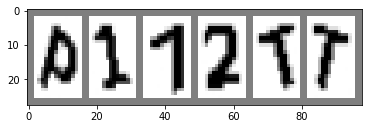

    P     1     7     2     T     T


In [91]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import  torchvision

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(dataloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(6)))

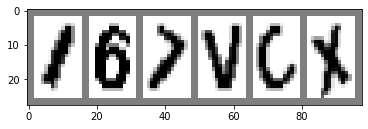

GroundTruth:      I     6     7     V     C     X
Predicted:        I     6     7     V     C     X


In [106]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(6)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(6)))

6

In [68]:
print(classes)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [151]:
import torch
import cv2
imgf="000172.png"
img=cv2.imread(imgf)
backup = img.copy()   #taking backup of the input image

grey= cv2.cvtColor(backup, cv2.COLOR_BGR2GRAY)

In [152]:
digit = cv2.resize(grey,(14,24))

In [153]:
tens = torch.tensor(digit,dtype=torch.float32)

In [154]:
s=torch.unsqueeze(tens,0)
s=torch.unsqueeze(s,1)
s.shape
x=torch.zeros(6,1,24,14)

In [155]:
for i in range(6):
    x[i][0]=tens

In [161]:
transforms.Grayscale(x)

AttributeError: 'Tensor' object has no attribute 'transforms'

In [157]:
with torch.no_grad():
    result = net(x)
    _,pred = torch.max(result,1)


In [158]:
classes[pred[0]]

'H'